In [1]:
# Importing some important libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib widget
from matplotlib.colors import ListedColormap


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# IMPORTING THE DATA (csv file named Churn.csv)

In [3]:
# type your code here
data_churn=pd.read_csv("https://raw.githubusercontent.com/shubhamsharma12393/telecom/main/Telecom%20Customer-Churn.csv")
data_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# DATA PREPROCESSING 

In [4]:
# checking the shape of the raw data 
data_churn.shape   # There are 7043 observations and 21 variables (including target variable (CHURN))

(7043, 21)

In [5]:
data_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### 1. From the above info, there are 7043 rows/entries and 21 columns/features
### 2. The dataset is made up of 3 data types; float, integer and object.
### 3. Looking at the above dataset, there are 2 float(decimals), 2 integer(whole numbers) and 17 object (categorical) columns/features,
### 4. TotalCharges which is supposed to be a float feature is an object. Also Senior Citizen must be object instead of integer. So changig the data type respectively. 

In [6]:
data_churn['TotalCharges'] = pd.to_numeric(data_churn['TotalCharges'], errors= 'coerce')

In [7]:
data_churn['SeniorCitizen']= data_churn['SeniorCitizen'].astype('object')

In [8]:
data_churn.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
data_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
percentage_missing= data_churn.isnull().sum().sum()/len(data_churn)*100
percentage_missing

0.1561834445548772

### There are 11 missing entries in column TotalCharges. As number of missing values are 11 which account for 0.15%. So we can drop the rows. 

In [11]:
null_index= data_churn[data_churn['TotalCharges'].isnull()].index
data_churn.drop(null_index, inplace = True)

In [12]:
data_churn.shape

(7032, 21)

### ASSUMPTION: There are cerain columns which contain the value "No Internet Service" and "No Phone Service". No Internet Service or No Phone Service in other way can be assumed to to be an attribute of not availing the Services so it is converted into 'No'.

In [13]:
data_churn= data_churn.replace('No phone service', 'No')
data_churn= data_churn.replace('No internet service', 'No')

# EXPLORATORY DATA ANALYSIS

## CLASS COUNT OF CHURN

In [14]:
data_churn['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [15]:
data_churn['Churn'].value_counts()*100/len(data_churn['Churn'])

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

In [16]:
data_churn['SeniorCitizen']= data_churn['SeniorCitizen'].astype(object)
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Text(0.5, 1.0, 'FIG.#1 Distribution of Churn and Non_churn')

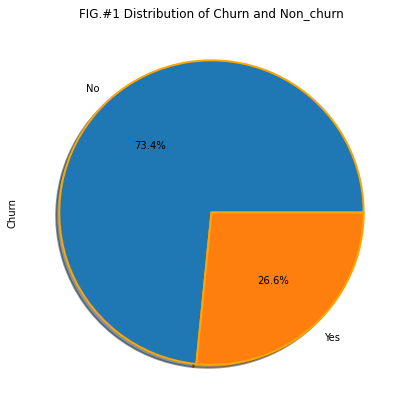

In [17]:
plt.figure(figsize=(10,7))
ax=data_churn['Churn'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,wedgeprops= { 'linewidth' : 2,'edgecolor' : "orange" })
ax.set_title("FIG.#1 Distribution of Churn and Non_churn")

In [18]:
# From FIG#1 we can say that data is in the ratio for YES:NO ~ 25:75

## CLASS COUNT OF GENDER

In [19]:
data_churn['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [20]:
data_churn.groupby('Churn')['gender'].value_counts()/len(data_churn['gender'])*100

Churn  gender
No     Male      37.244027
       Female    36.177474
Yes    Female    13.353242
       Male      13.225256
Name: gender, dtype: float64

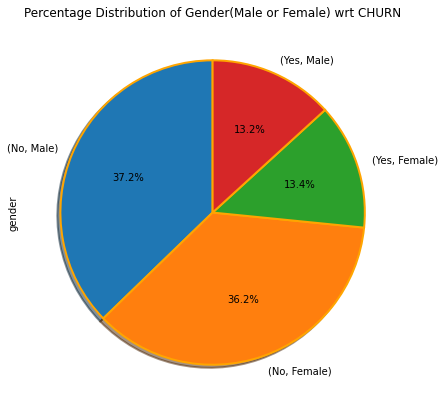

In [21]:
plt.figure(figsize=(10,7))

ax=data_churn.groupby('Churn')['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,
                                          wedgeprops   = { 'linewidth' : 2,'edgecolor' : "orange" },startangle=90
                                          )
ax.set_title("Percentage Distribution of Gender(Male or Female) wrt CHURN");

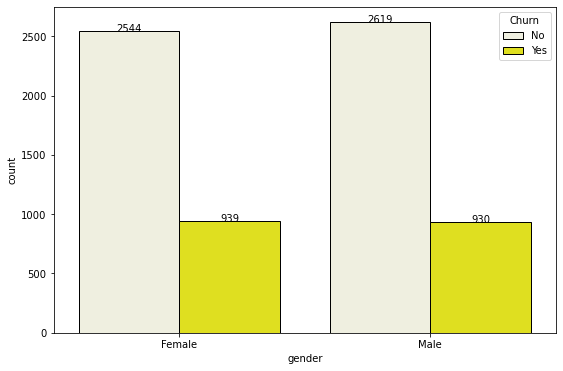

In [22]:
plt.figure(figsize=(9,6))

ax=sns.countplot(data=data_churn, x='gender', hue='Churn', color='Yellow', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [23]:
# the distribution of customers with respect to their gender is seen to be equal which is very good.
# The churn rate with respect to Gender is also same, from which we can conclude that churn rate is independent of the 
# gender.

# Class count for SeniorCitizen

In [24]:
data_churn['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [25]:
data_churn['SeniorCitizen'].value_counts()*100/len(data_churn['SeniorCitizen'])

0    83.759954
1    16.240046
Name: SeniorCitizen, dtype: float64

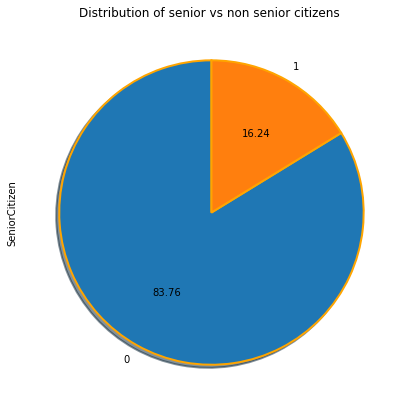

In [26]:
plt.figure(figsize=(10,7))

ax=data_churn['SeniorCitizen'].value_counts().plot(kind='pie',autopct='%.2f',shadow=True,
                                          wedgeprops   = { 'linewidth' : 2,'edgecolor' : "orange" },startangle=90)
ax.set_title("Distribution of senior vs non senior citizens ");

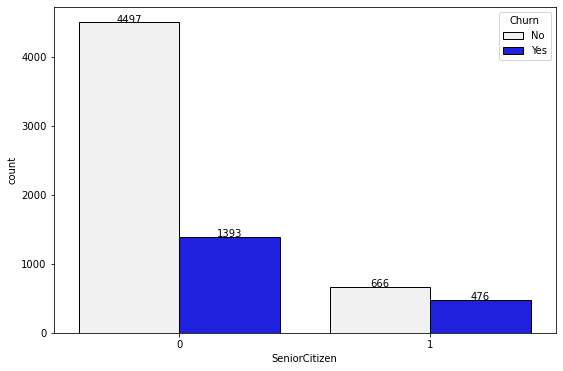

In [27]:
plt.figure(figsize=(9,6))

ax=sns.countplot(data=data_churn, x='SeniorCitizen', hue='Churn', color='Blue', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [28]:
# The age wise distribution shows us that the 4/5th of the customers pool is from young to middle age ie: economically active population.
# The company is losing a large portion(>3/4th) of its senior citizens customers which is alarming.

# Class count for Partner

In [29]:
data_churn['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [30]:
data_churn['Partner'].value_counts()*100/len(data_churn['Partner'])

No     51.749147
Yes    48.250853
Name: Partner, dtype: float64

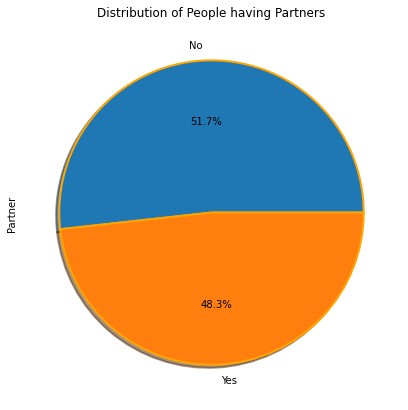

In [31]:
plt.figure(figsize=(10,7))
ax=data_churn['Partner'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,wedgeprops= { 'linewidth' : 2,'edgecolor' : "orange" })
ax.set_title("Distribution of People having Partners");

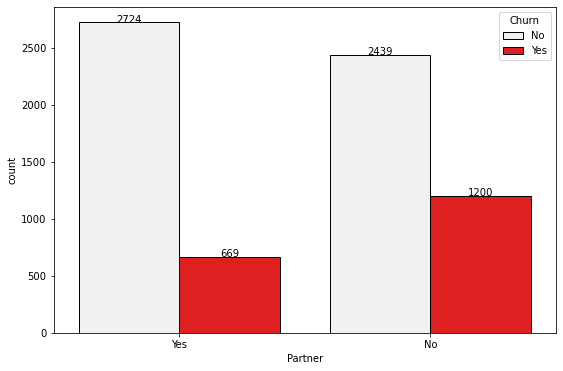

In [32]:
plt.figure(figsize=(9,6))

ax=sns.countplot(data=data_churn, x='Partner', hue='Churn', color='Red', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [33]:
# the distribution of people who are single and married almost similar.
# The churn rate for married people is in line with industry average. 
# But the churn rate of Single people is almost 50% which is bad.

# Class count for Dependants

In [34]:
data_churn['Dependents'].value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [35]:
data_churn['Dependents'].value_counts()*100/len(data_churn['Partner'])

No     70.150739
Yes    29.849261
Name: Dependents, dtype: float64

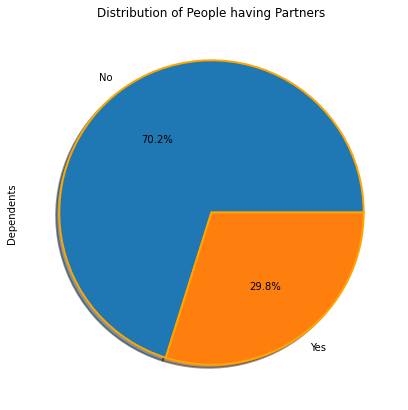

In [36]:
plt.figure(figsize=(10,7))
ax=data_churn['Dependents'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,wedgeprops= { 'linewidth' : 2,'edgecolor' : "orange" })
ax.set_title("Distribution of People having Partners");

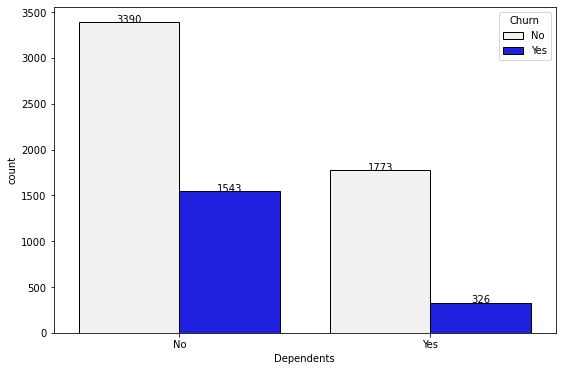

In [37]:
plt.figure(figsize=(9,6))
ax=sns.countplot(data=data_churn, x = 'Dependents', hue = 'Churn', color = 'blue', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [38]:
# The distribution consistes of people with 70% of the customers with nil dependents.
#The churn rate is significantly high for people with nil dependents. 
# The churn rate is far less in with people having dependents.


# Class Count for PhoneService


In [39]:
data_churn['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [40]:
data_churn['PhoneService'].value_counts()*100/len(data_churn['PhoneService'])

Yes    90.32992
No      9.67008
Name: PhoneService, dtype: float64

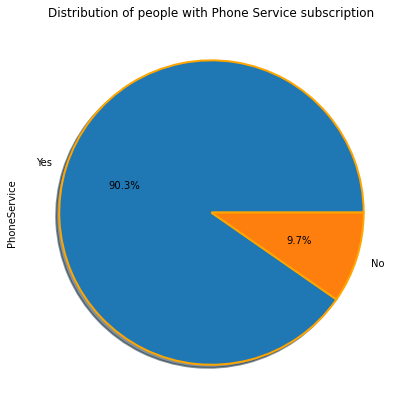

In [41]:
plt.figure(figsize=(10,7))
ax=data_churn['PhoneService'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,wedgeprops= { 'linewidth' : 2,'edgecolor' : "orange" })
ax.set_title("Distribution of people with Phone Service subscription");

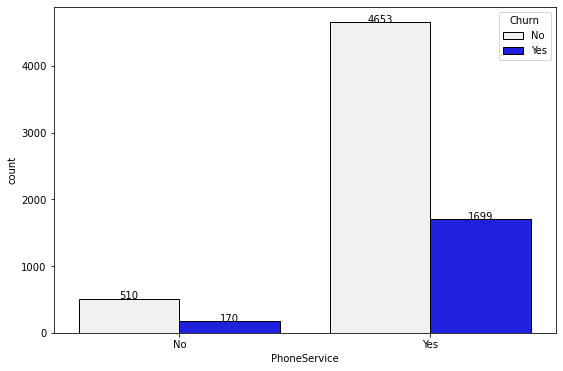

In [42]:
plt.figure(figsize=(9,6))
ax=sns.countplot(data=data_churn, x = 'PhoneService', hue = 'Churn', color = 'blue', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [43]:
# From distribution 9 out of 10 people have Phone service enebaled.
# The churn rate proportionate with respect to average churn.

# Class count for MultipleLines

In [44]:
data_churn['MultipleLines'].value_counts()

No     4065
Yes    2967
Name: MultipleLines, dtype: int64

In [45]:
data_churn['MultipleLines'].value_counts()*100/len(data_churn['MultipleLines'])

No     57.807167
Yes    42.192833
Name: MultipleLines, dtype: float64

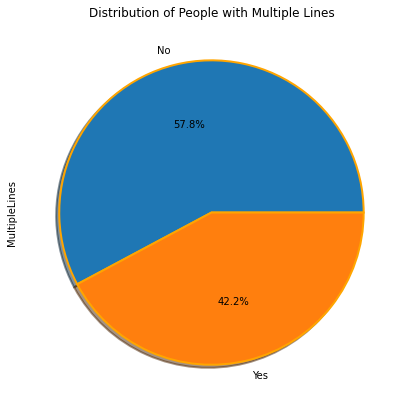

In [46]:
plt.figure(figsize=(10,7))
ax=data_churn['MultipleLines'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,wedgeprops= { 'linewidth' : 2,'edgecolor' : "orange" })
ax.set_title("Distribution of People with Multiple Lines");

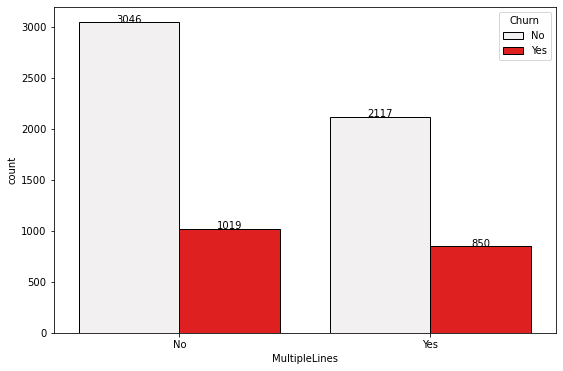

In [47]:
plt.figure(figsize=(9,6))
ax=sns.countplot(data = data_churn, x = 'MultipleLines' , hue = 'Churn', color = 'Red', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [48]:
# Almost half the population are using multiple lines.
#The Churn rate is significantly higher ( almost similar to that of people without multiple lines) which is unhealthy.


# Class count for InternetService

In [49]:
data_churn['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [50]:
data_churn['InternetService'].value_counts()*100/len(data_churn['InternetService'])

Fiber optic    44.027304
DSL            34.357224
No             21.615472
Name: InternetService, dtype: float64

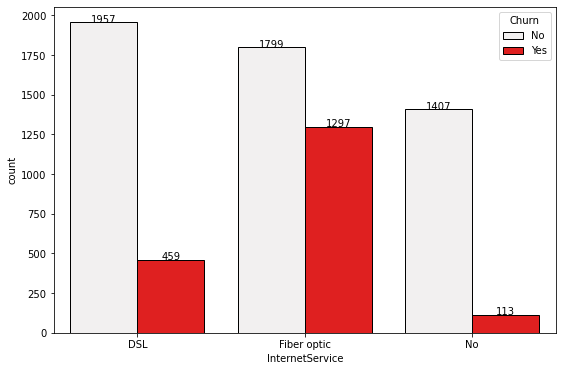

In [51]:
plt.figure(figsize=(9,6))
ax=sns.countplot(data = data_churn, x = 'InternetService' , hue = 'Churn', color = 'Red', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()
plt.show()

# Class count for OnlineSecurity

In [52]:
data_churn['OnlineSecurity'].value_counts()

No     5017
Yes    2015
Name: OnlineSecurity, dtype: int64

In [53]:
data_churn['OnlineSecurity'].value_counts()*100/len(data_churn['OnlineSecurity'])

No     71.345279
Yes    28.654721
Name: OnlineSecurity, dtype: float64

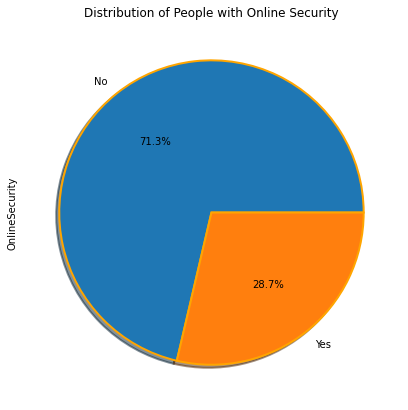

In [54]:
plt.figure(figsize=(10,7))
ax=data_churn['OnlineSecurity'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,wedgeprops= { 'linewidth' : 2,'edgecolor' : "orange" })
ax.set_title("Distribution of People with Online Security");

In [55]:
# The chart shows that half the customers are not having online security which is crtical in today's digital world.
# 

# Class count for OnlineBackup

In [56]:
data_churn['OnlineBackup'].value_counts()

No     4607
Yes    2425
Name: OnlineBackup, dtype: int64

In [57]:
data_churn['OnlineBackup'].value_counts()*100/len(data_churn['OnlineBackup'])

No     65.51479
Yes    34.48521
Name: OnlineBackup, dtype: float64

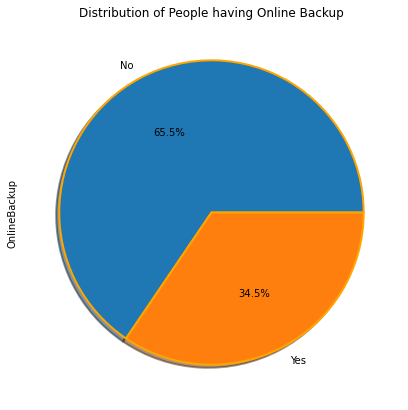

In [58]:
plt.figure(figsize=(10,7))
ax=data_churn['OnlineBackup'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,wedgeprops= { 'linewidth' : 2,'edgecolor' : "orange" })
ax.set_title("Distribution of People having Online Backup");

In [59]:
# The majority dont have or not availed online backup mode.

# Class count for DeviceProtection

In [60]:
data_churn['DeviceProtection'].value_counts()

No     4614
Yes    2418
Name: DeviceProtection, dtype: int64

In [61]:
data_churn['DeviceProtection'].value_counts()*100/len(data_churn['DeviceProtection'])

No     65.614334
Yes    34.385666
Name: DeviceProtection, dtype: float64

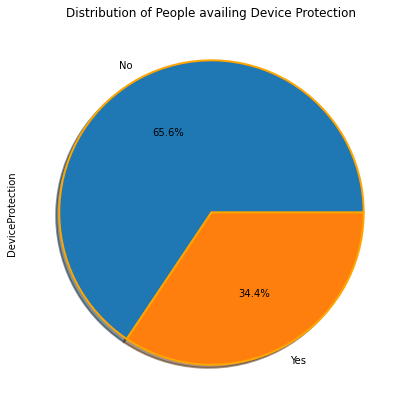

In [62]:
plt.figure(figsize=(10,7))
ax=data_churn['DeviceProtection'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,wedgeprops= { 'linewidth' : 2,'edgecolor' : "orange" })
ax.set_title("Distribution of People availing Device Protection");

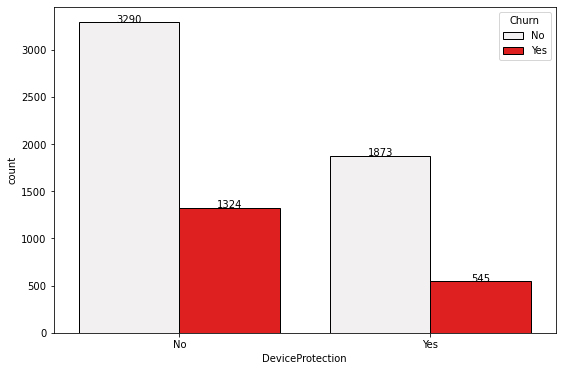

In [63]:
plt.figure(figsize=(9,6))
ax=sns.countplot(data = data_churn, x = 'DeviceProtection' , hue = 'Churn', color = 'Red', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [64]:
# We can clearly draw a conclusion that churn rate is significantly proportional to Device protection feature.

# Class count for TechSupport

In [65]:
data_churn['TechSupport'].value_counts()

No     4992
Yes    2040
Name: TechSupport, dtype: int64

In [66]:
data_churn['TechSupport'].value_counts()*100/len(data_churn['TechSupport'])

No     70.989761
Yes    29.010239
Name: TechSupport, dtype: float64

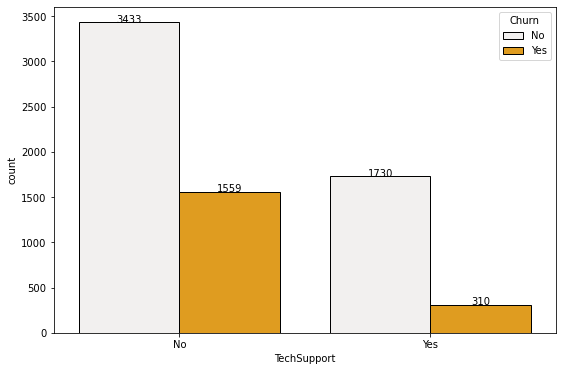

In [67]:
plt.figure(figsize=(9,6))
ax=sns.countplot(data = data_churn, x = 'TechSupport' , hue = 'Churn', color = 'Orange', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [68]:
# The chart depicts that 50% of the customers do not have access to tech support which reults in unpleasant customer.
# Approximately 3/4th of the customers with no tech support are leaving the company.

# Class count for StreamingTV

In [69]:
data_churn['StreamingTV'].value_counts()

No     4329
Yes    2703
Name: StreamingTV, dtype: int64

In [70]:
data_churn['StreamingTV'].value_counts()*100/len(data_churn['StreamingTV'])

No     61.561433
Yes    38.438567
Name: StreamingTV, dtype: float64

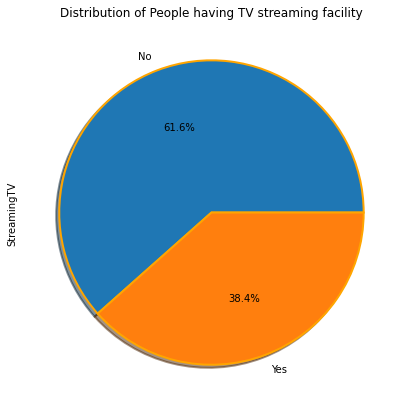

In [71]:
plt.figure(figsize=(10,7))
ax=data_churn['StreamingTV'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,wedgeprops= { 'linewidth' : 2,'edgecolor' : "orange" })
ax.set_title("Distribution of People having TV streaming facility");

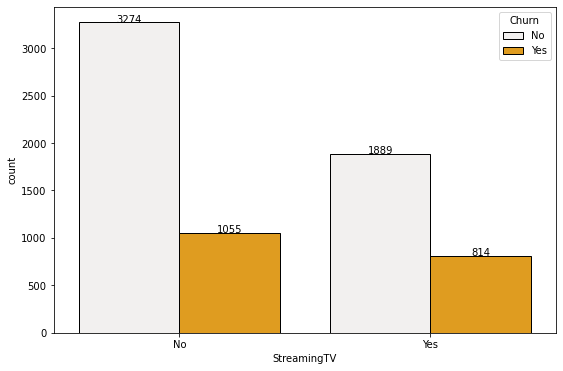

In [72]:
plt.figure(figsize=(9,6))
ax=sns.countplot(data = data_churn, x = 'StreamingTV' , hue = 'Churn', color = 'Orange', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [73]:
# The churn rate is close to 50% with people having TV streaming which may or may not be due to streaming experience.

# Class count for StreamingMovies

In [74]:
data_churn['StreamingMovies'].value_counts()

No     4301
Yes    2731
Name: StreamingMovies, dtype: int64

In [75]:
data_churn['StreamingMovies'].value_counts()*100/len(data_churn['StreamingMovies'])

No     61.163254
Yes    38.836746
Name: StreamingMovies, dtype: float64

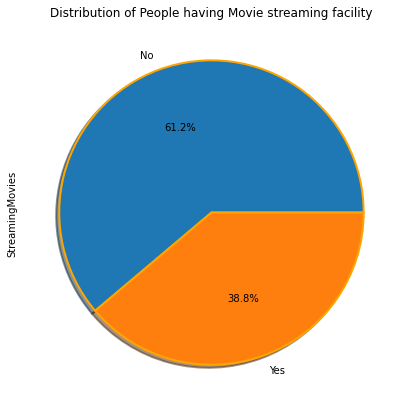

In [76]:
plt.figure(figsize=(10,7))
ax=data_churn['StreamingMovies'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,wedgeprops= { 'linewidth' : 2,'edgecolor' : "orange" })
ax.set_title("Distribution of People having Movie streaming facility");

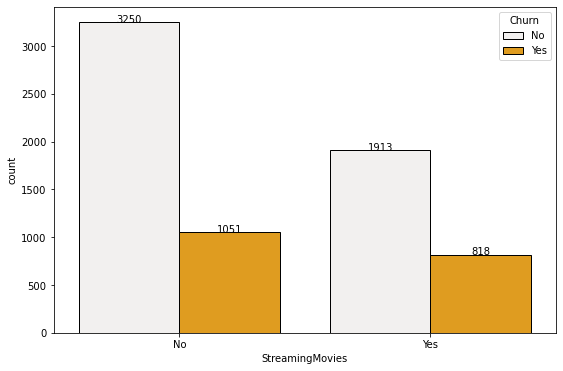

In [77]:
plt.figure(figsize=(9,6))
ax=sns.countplot(data = data_churn, x = 'StreamingMovies' , hue = 'Churn', color = 'Orange', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

# Class count for Contract

In [78]:
data_churn['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [79]:
data_churn['Contract'].value_counts()*100/len(data_churn['Contract'])

Month-to-month    55.105233
Two year          23.961889
One year          20.932878
Name: Contract, dtype: float64

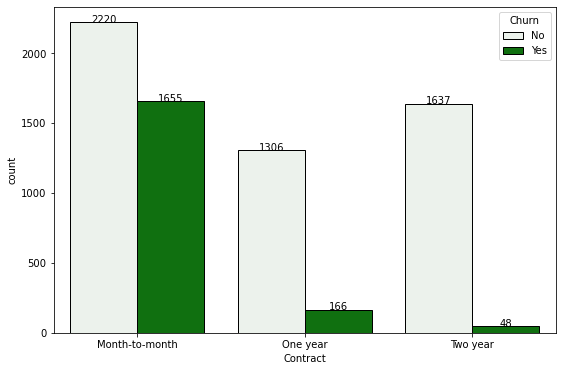

In [80]:
plt.figure(figsize=(9,6))
ax=sns.countplot(data = data_churn, x = 'Contract' , hue = 'Churn', color = 'Green', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [81]:
# As people are purchasing year long contracts they are bound to stay with the company as opposed to monthly subscription.
# This may or may not be due to benefits enjoyed by them. As they can even leave after their contrct ends.

# Class count for PaperlessBilling

In [82]:
data_churn['PaperlessBilling'].value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

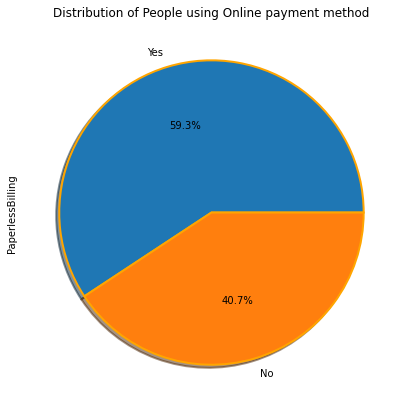

In [83]:
plt.figure(figsize=(10,7))
ax=data_churn['PaperlessBilling'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,wedgeprops= { 'linewidth' : 2,'edgecolor' : "orange" })
ax.set_title("Distribution of People using Online payment method");

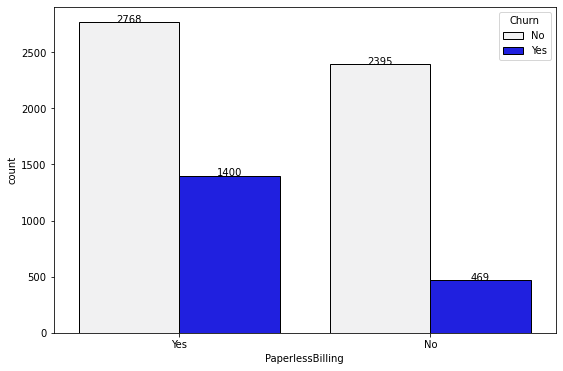

In [84]:
plt.figure(figsize=(9,6))
ax=sns.countplot(data= data_churn, x= 'PaperlessBilling', hue= 'Churn', color = 'Blue', edgecolor = 'Black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [85]:
# This is added advantage to customers This does not mean that it directly affects the churn rate.
#al though we can see that people are facing discomfort with Online payments method.

# Class count for PaymentMethod

In [86]:
data_churn['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [87]:
data_churn['PaymentMethod'].value_counts()*100/len(data_churn['PaymentMethod'])

Electronic check             33.631968
Mailed check                 22.810011
Bank transfer (automatic)    21.928328
Credit card (automatic)      21.629693
Name: PaymentMethod, dtype: float64

<AxesSubplot:ylabel='PaymentMethod'>

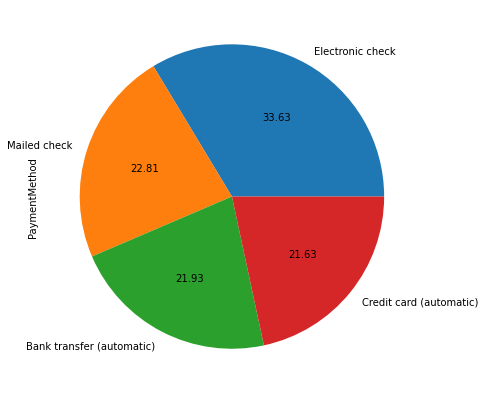

In [88]:
data_churn['PaymentMethod'].value_counts().plot(kind='pie' ,autopct='%.2f', figsize = (14,7) )

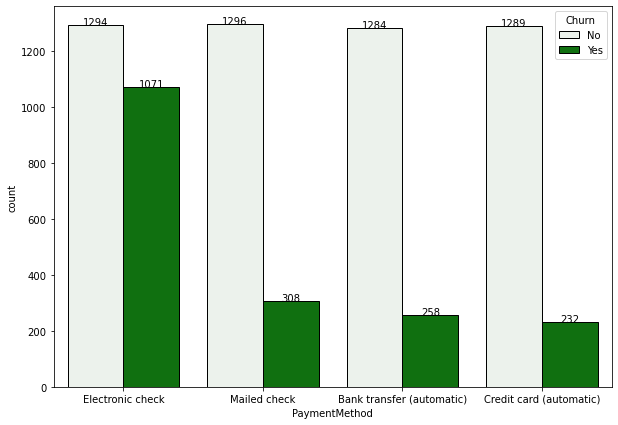

In [89]:
plt.figure(figsize=(10,7))
ax=sns.countplot(data = data_churn , x = 'PaymentMethod', hue = 'Churn',color = 'Green', edgecolor = 'black')
for p in ax.patches:
    height=p.get_height()
    ax.text(x=p.get_x() + (p.get_width()/2),
    y=height+0.2,ha='center',s='{:.0f}'.format(height))
plt.show()

In [90]:
# the payment methods usage are almost eqaully distributed.
#But the electronic check method shows much churn .

<AxesSubplot:xlabel='tenure', ylabel='count'>

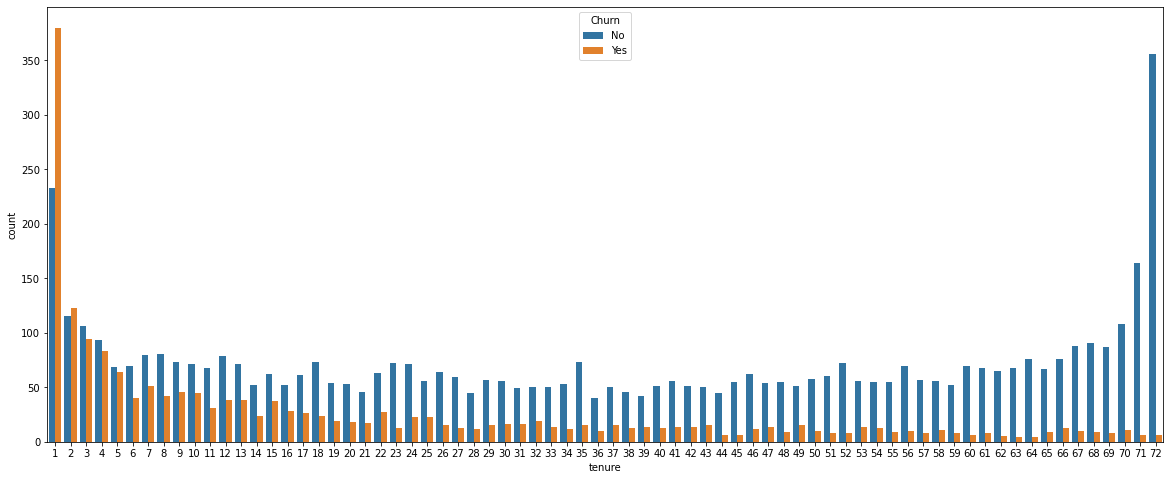

In [91]:
plt.figure(figsize=(20,8))
sns.countplot(data_churn['tenure'],hue=data_churn['Churn'])

#- As tenure of a customer increases ,churning decreases significantly.

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

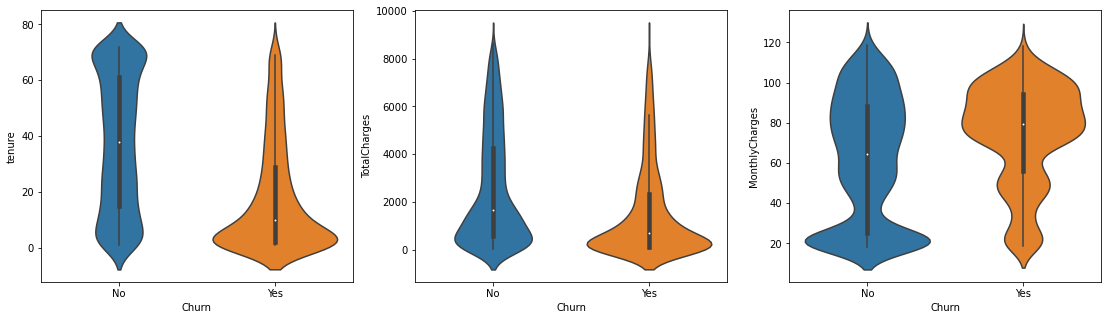

In [92]:
plt.figure(figsize=(19,5))
plt.subplot(1,3,1)
sns.violinplot('Churn','tenure',data=data_churn,orient="v")

plt.subplot(1,3,2)
sns.violinplot('Churn','TotalCharges',data=data_churn,orient="v")

plt.subplot(1,3,3)
sns.violinplot('Churn','MonthlyCharges',data=data_churn,orient="v")


#### fig. 1
- The Old the Customer is the more Loyal he is to the Company.
- Here we can clearly see that more than 50% of the people who churned out were customers for less than 20 months
- we can also see that customers who churned with tenure have right skewed distribution.

#### fig.2 
- As total charge increases, customer becomes more associated with the company.
- more than 50% of the customer who spend less than 1000 total charges were churned out.
- Here we can clearly see that more than 50% of the people who retained were customers who spend near about 2000 total charges.

#### fig.3
- As monthly charge increases , customer churned out.
- 50% of the customer who churned out have near about 80 monthly charges.
- 50 % of the customer who didn't churned out have monthly charges between 60-70.

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

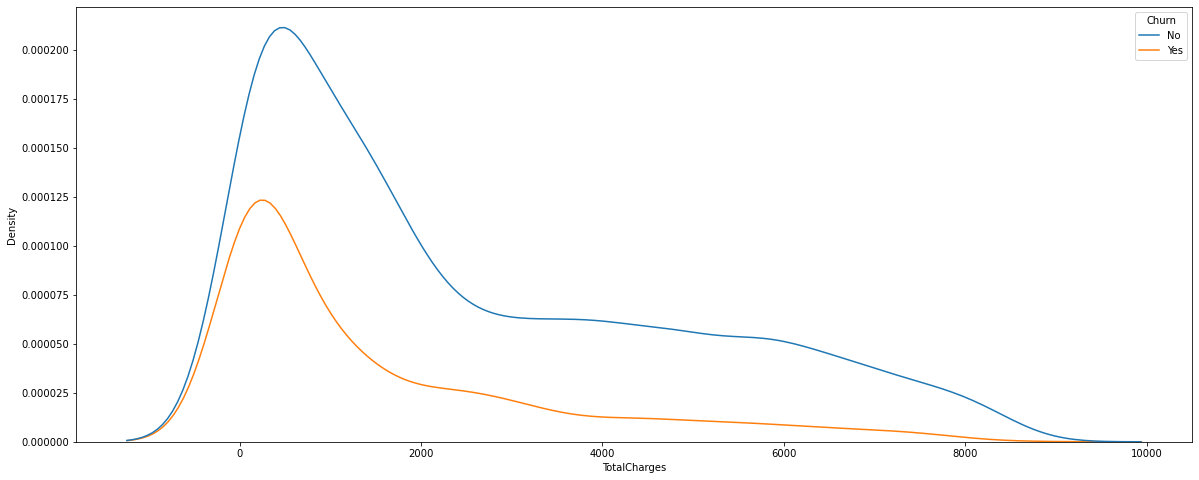

In [93]:
plt.figure(figsize=(20,8))
sns.kdeplot(data=data_churn, x="TotalCharges", hue="Churn")

- Mostly churning is between 0 to 2000

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

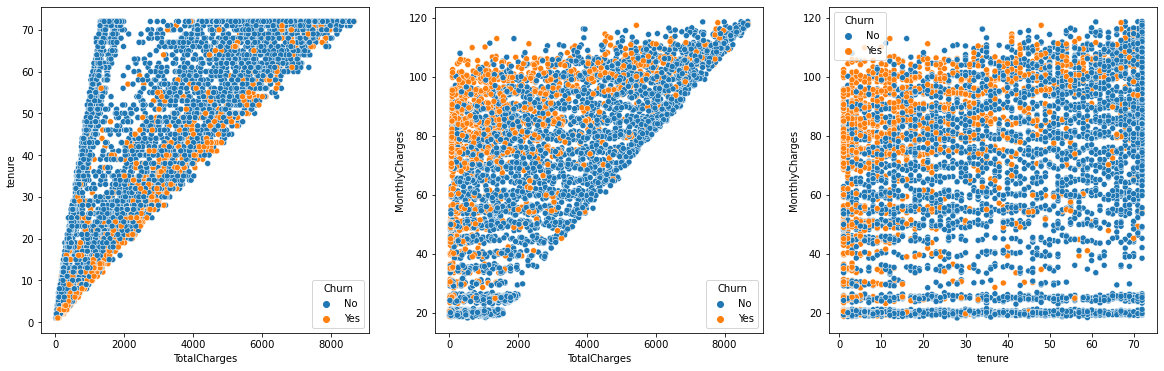

In [94]:
plt.figure(figsize=(20,6))


plt.subplot(1,3,1)
sns.scatterplot(data_churn['TotalCharges'], data_churn["tenure"],hue=data_churn['Churn'])

plt.subplot(1,3,2)
sns.scatterplot(data_churn["TotalCharges"],data_churn["MonthlyCharges"],hue=data_churn['Churn'])

plt.subplot(1,3,3)
sns.scatterplot(data_churn["tenure"], data_churn["MonthlyCharges"],hue=data_churn['Churn'])


- The lower the total charges and tenure, the higher the churn.
- Churn is higher for highers bands of monthly charges.
- if tenure is less, and monthly charges are more , customer is more likely to churn



# Visualization

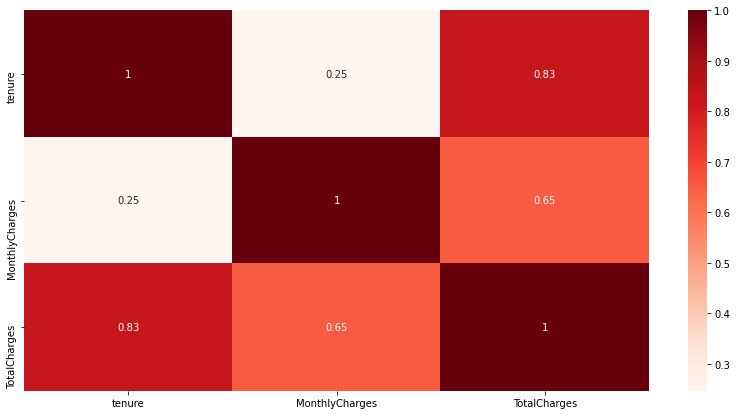

In [95]:
plt.figure(figsize=(14,7)) 
sns.heatmap(data_churn.corr(), annot=True ,cmap = 'Reds')
plt.show()

In [96]:
# From the above heatmap correlation :
# TotalCharges ~ Tenure is having a strong correlation
# MonthlyCharges ~ TotalCharges is having a significant correlation.

In [97]:
# Defining the Independent Variable and sepearting them into categorical and numerical data
# Dropping the gender variable as we have seen in the EDA that the gender variable is not a very significant in determining the churn of the customers 
X_num= data_churn.drop(['customerID', 'gender', 'Churn'], axis= 1).select_dtypes(include= [np.number])
X_cat= data_churn.drop(['customerID', 'gender', 'Churn'], axis= 1).select_dtypes(include= 'object')

In [98]:
# Converting the Output Varible into Binary Variable using lable Encoding
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
data_churn['Churn']= LE.fit_transform(data_churn['Churn'])

In [99]:
# defining the dependent variable 
y= data_churn['Churn']

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
# sclaing the numerical variables
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(X_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
X_num_scaled = pd.DataFrame(num_scaled, columns = X_num.columns, index= data_churn.index)
X_num_scaled

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7038,-0.343137,0.664868,-0.129180
7039,1.612573,1.276493,2.241056
7040,-0.872808,-1.170004,-0.854514
7041,-1.158016,0.319168,-0.872095


In [102]:
# dummy variables for the categorical variable
dummy_var = pd.get_dummies(data = X_cat, drop_first = True)
dummy_var.columns

Index(['SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [103]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([X_num_scaled, dummy_var], axis = 1)

In [104]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7032 non-null   float64
 1   MonthlyCharges                         7032 non-null   float64
 2   TotalCharges                           7032 non-null   float64
 3   SeniorCitizen_1                        7032 non-null   uint8  
 4   Partner_Yes                            7032 non-null   uint8  
 5   Dependents_Yes                         7032 non-null   uint8  
 6   PhoneService_Yes                       7032 non-null   uint8  
 7   MultipleLines_Yes                      7032 non-null   uint8  
 8   InternetService_Fiber optic            7032 non-null   uint8  
 9   InternetService_No                     7032 non-null   uint8  
 10  OnlineSecurity_Yes                     7032 non-null   uint8  
 11  Onli

In [105]:
# train test split
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm

X= sm.add_constant(X)

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=10, test_size = 0.3, stratify= y) 
# stratify is used so that both train and test dataset represent the original data

In [106]:
y_train.value_counts()

0    3614
1    1308
Name: Churn, dtype: int64

In [107]:
y_train.value_counts()/len(y_train)*100

0    73.425437
1    26.574563
Name: Churn, dtype: float64

### THe data is IMBALANCED with  ratio ~ 73:27

### Calculating the variation inflation factor for the numeric data types. 

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X[['tenure',"MonthlyCharges", "TotalCharges" ]].values, i) for i in range(X[['tenure',"MonthlyCharges", "TotalCharges" ]].shape[1])]
vif["features"] = X[['tenure',"MonthlyCharges", "TotalCharges" ]].columns
vif

,VIF Factor,features
0,5.844646,tenure
1,3.225293,MonthlyCharges
2,9.526697,TotalCharges


### No numerical variable needs to be dropped as VIF is below 10 for all the variables. 

In [109]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# Some User defined functions for makingthe working easier

In [110]:

def Logistic_model_insights(X_train, X_test, y_train, y_test,model_name, cut_off):
    y_pred_prob_test = model_name.predict(X_test)
    y_pred_prob_train = model_name.predict(X_train)
    #print(y_pred_prob.head())
    
    y_pred_test = [ 0 if x < cut_off else 1 for x in y_pred_prob_test]
    y_pred_train= [ 0 if x < cut_off else 1 for x in y_pred_prob_train]
    
    
    train_report= classification_report(y_train, y_pred_train)
    print("The Train data classification report")
    print (train_report)
    
    
    
    test_report= classification_report(y_test, y_pred_test)
    print("The Test data classification report") 
    print(test_report)
    
    fpr,tpr,thres = roc_curve(y_test,y_pred_prob_test)
    roc_df = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':thres})
    
    
    
    
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.plot(roc_df['FPR'],roc_df['TPR'])
    plt.plot([0,1],[0,1])
    
    plt.title('ROC curve for Churn Prediction', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_test),4)))
    plt.grid(True)
    
    kappa = cohen_kappa_score(y_test, y_pred_test)

# print the kappa value
    print('kappa value:',kappa)
    
    

In [111]:
# creating user defined function for calculating Youden's Index
def Youdens_index(X_test, y_test, model_name):
    y_pred_prob_test = model_name.predict(X_test)
    fpr,tpr,thres = roc_curve(y_test,y_pred_prob_test)
    youdens_table = pd.DataFrame({'TPR': tpr,
                                 'FPR': fpr,
                                 'Threshold': thres})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
    youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
    youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
    return youdens_table.head(1)

In [112]:
def feature_importance(model_name,X_train):
    feat_imp=pd.Series(model_name.feature_importances_,index=X_train.columns)
    feat_imp.nlargest(10).plot(kind='barh')

In [113]:
#function for the comaprison of metrics in logistic regression 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, cohen_kappa_score, roc_auc_score

score_card = pd.DataFrame(columns=['Model', 'Data Balanced/Imbalanced', 'Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

def Score_card_logistic(model_name, X_train, X_test, y_train, y_test, cut_off, data_status, Name_taken_for_model):    # data_status means balanced or imbalanced
    y_pred_prob= model_name.predict(X_test)
#    y_pred_train= model_name.predict(X_train)
    
#    y_pred_prob_train= [1 if i > cut_off else 0 for i in y_pred_train]
    y_pred=  [1 if i > cut_off else 0 for i in y_pred_prob]
    
     # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({ 'Model': Name_taken_for_model, 'Data Balanced/Imbalanced': data_status, 'Probability Cutoff': cut_off,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    

In [114]:
score_card_classification = pd.DataFrame(columns=['Model', 'Data Balanced/Imbalanced', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

def Score_card_classification(model_name, X_train, X_test, y_train, y_test, data_status, Name_model_taken_as):    # data_status means balanced or imbalanced
    y_pred= model_name.predict(X_test)

    
     # assign 'score_card' as global variable
    global score_card_classification

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card_classification = score_card_classification.append({'Model': Name_model_taken_as, 'Data Balanced/Imbalanced': data_status,
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

### Building a Full-Model 

In [115]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg_full = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg_full.summary())

Optimization terminated successfully.
         Current function value: 0.412776
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4899
Method:                           MLE   Df Model:                           22
Date:                Fri, 13 May 2022   Pseudo R-squ.:                  0.2871
Time:                        11:43:20   Log-Likelihood:                -2031.7
converged:                       True   LL-Null:                       -2849.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.8649      

In [116]:
# The LLR p-value is less than 0.05, implies that the model is significant.

### AIC value is used to compare different models. 

## Prediction on the test set 

The Train data classification report
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      3614
           1       0.67      0.57      0.62      1308

    accuracy                           0.81      4922
   macro avg       0.76      0.73      0.75      4922
weighted avg       0.80      0.81      0.81      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.84      0.90      0.86      1549
           1       0.64      0.51      0.57       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.78      0.79      0.79      2110

kappa value: 0.4365876557975963


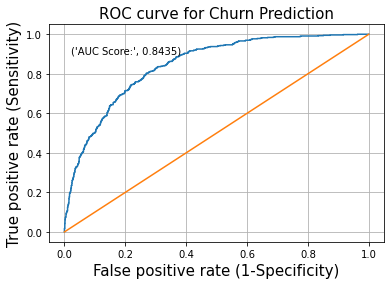

In [117]:
Logistic_model_insights(X_train, X_test, y_train, y_test,logreg_full, 0.5)

In [118]:
Score_card_logistic(logreg_full, X_train, X_test, y_train, y_test, 0.5, 'Imbalanced', 'Logreg_full')

In [119]:
score_card

,Model,Data Balanced/Imbalanced,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logreg_full,Imbalanced,0.5,0.704147,0.642058,0.511586,0.794313,0.436588,0.569444


### We need to identify the best cut-off value

## USING Youden's Index

In [120]:
Youdens_index(X_test, y_test, logreg_full)

,TPR,FPR,Threshold,Difference
0,0.802139,0.26856,0.258336,0.533579


In [121]:
# maximum Youden's Index is found as 0.533 with cut-off value 0.258

The Train data classification report
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      3614
           1       0.52      0.82      0.64      1308

    accuracy                           0.75      4922
   macro avg       0.72      0.77      0.72      4922
weighted avg       0.81      0.75      0.76      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1549
           1       0.52      0.80      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110

kappa value: 0.4547343768848212


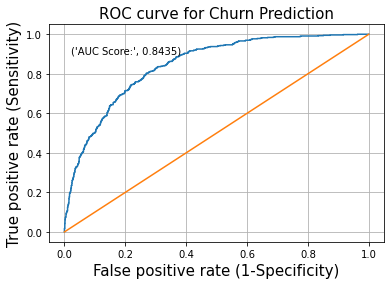

In [122]:
Logistic_model_insights(X_train, X_test, y_train, y_test, logreg_full, 0.258336)

As kappa is 0.4861, greater than 0.33(cut-off) so we can say that there is a substantial agreement between actual and predicted value 

In [123]:
Score_card_logistic(logreg_full, X_train, X_test, y_train, y_test, 0.258, 'Imbalanced', 'Logreg_full')

In [124]:
score_card

,Model,Data Balanced/Imbalanced,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logreg_full,Imbalanced,0.500,0.704147,0.642058,0.511586,0.794313,0.436588,0.569444
1,Logreg_full,Imbalanced,0.258,0.766789,0.519630,0.802139,0.750237,0.454734,0.630694


# Recursive Feature Engineering is used for feature selection

In [125]:
from sklearn.feature_selection import RFE

In [126]:
# consider the independent variables (without the intercept term)
# as, X_train and X_test contains the intercept term
# use 'iloc' to select the variables wthout intercept term 
X_train_rfe = X_train.iloc[:,1:]
X_test_rfe = X_test.iloc[:,1:]

# initiate logistic regression model to use in feature selection
logreg = LogisticRegression()

# build the RFE model
# pass the logistic regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator = logreg, n_features_to_select = 13)   # 13 is chosen after looking at the p value for features in the full model. 

# fit the RFE model on the train dataset using fit()
rfe_model = rfe_model.fit(X_train_rfe, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['tenure', 'TotalCharges', 'PhoneService_Yes', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Electronic check'],
      dtype='object')


In [127]:
X_train_rfe= X_train[['const','tenure', 'TotalCharges', 'PhoneService_Yes', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Electronic check']]

X_test_rfe= X_test[['const', 'tenure', 'TotalCharges', 'PhoneService_Yes', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Electronic check']]

In [128]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
# consider the variables obtained from RFE method and the intercept term
logreg_rfe = sm.Logit(y_train, X_train_rfe).fit()

# print the summary of the model
print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.414594
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4908
Method:                           MLE   Df Model:                           13
Date:                Fri, 13 May 2022   Pseudo R-squ.:                  0.2839
Time:                        11:43:21   Log-Likelihood:                -2040.6
converged:                       True   LL-Null:                       -2849.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.1700      0.167     -7.017     

The Train data classification report
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3614
           1       0.66      0.56      0.60      1308

    accuracy                           0.80      4922
   macro avg       0.75      0.73      0.74      4922
weighted avg       0.80      0.80      0.80      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.52      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

kappa value: 0.4417803962971577


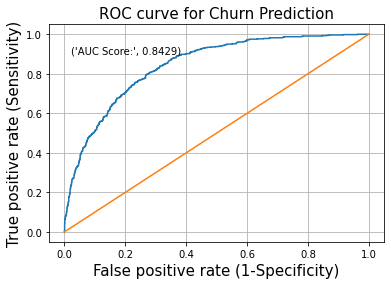

In [129]:
Logistic_model_insights(X_train_rfe, X_test_rfe, y_train, y_test, logreg_rfe, 0.5)

In [130]:
Score_card_logistic(logreg_rfe, X_train_rfe, X_test_rfe, y_train, y_test, 0.5, 'Imbalanced', 'logreg_rfe')

In [131]:
score_card

,Model,Data Balanced/Imbalanced,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logreg_full,Imbalanced,0.500,0.704147,0.642058,0.511586,0.794313,0.436588,0.569444
1,Logreg_full,Imbalanced,0.258,0.766789,0.519630,0.802139,0.750237,0.454734,0.630694
2,logreg_rfe,Imbalanced,0.500,0.706575,0.646532,0.515152,0.796209,0.441780,0.573413


In [132]:
Youdens_index(X_test_rfe, y_test, logreg_rfe)

,TPR,FPR,Threshold,Difference
0,0.796791,0.269852,0.262159,0.52694


In [133]:
# cut-off came out to be 0.26

The Train data classification report
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      3614
           1       0.51      0.82      0.63      1308

    accuracy                           0.75      4922
   macro avg       0.71      0.77      0.72      4922
weighted avg       0.81      0.75      0.76      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1549
           1       0.51      0.80      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.75      0.76      2110

kappa value: 0.44752773740132235


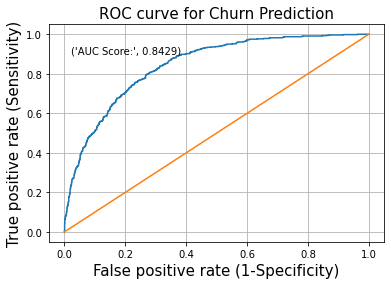

In [134]:
Logistic_model_insights(X_train_rfe, X_test_rfe, y_train, y_test, logreg_rfe, 0.26)

In [135]:
Score_card_logistic(logreg_rfe, X_train_rfe, X_test_rfe, y_train, y_test, 0.26, 'Imbalanced', 'logreg_rfe')

In [136]:
score_card

,Model,Data Balanced/Imbalanced,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logreg_full,Imbalanced,0.500,0.704147,0.642058,0.511586,0.794313,0.436588,0.569444
1,Logreg_full,Imbalanced,0.258,0.766789,0.519630,0.802139,0.750237,0.454734,0.630694
2,logreg_rfe,Imbalanced,0.500,0.706575,0.646532,0.515152,0.796209,0.441780,0.573413
3,logreg_rfe,Imbalanced,0.260,0.763070,0.514943,0.798574,0.746445,0.447528,0.626136


# The DATA is imbalanced. So, we need to balance the data for getting better insights after buliding the model. 

In [137]:
#importing libraries for the balancing of the data
from imblearn.over_sampling import ADASYN
ada= ADASYN(random_state= 130)
X_train_ada, y_train_ada= ada.fit_resample(X_train, y_train)

In [138]:
y_train_ada.value_counts()

1    3628
0    3614
Name: Churn, dtype: int64

# building a full model after data balancing

In [139]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg_bal = sm.Logit(y_train_ada, X_train_ada).fit()

# print the summary of the model
print(logreg_bal.summary())

Optimization terminated successfully.
         Current function value: 0.436747
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7242
Model:                          Logit   Df Residuals:                     7219
Method:                           MLE   Df Model:                           22
Date:                Fri, 13 May 2022   Pseudo R-squ.:                  0.3699
Time:                        11:43:22   Log-Likelihood:                -3162.9
converged:                       True   LL-Null:                       -5019.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    19.8972      

The Train data classification report
              precision    recall  f1-score   support

           0       0.81      0.74      0.78      3614
           1       0.76      0.83      0.80      3628

    accuracy                           0.79      7242
   macro avg       0.79      0.79      0.79      7242
weighted avg       0.79      0.79      0.79      7242

The Test data classification report
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1549
           1       0.51      0.73      0.60       561

    accuracy                           0.74      2110
   macro avg       0.69      0.74      0.70      2110
weighted avg       0.78      0.74      0.75      2110

kappa value: 0.4138163238806736


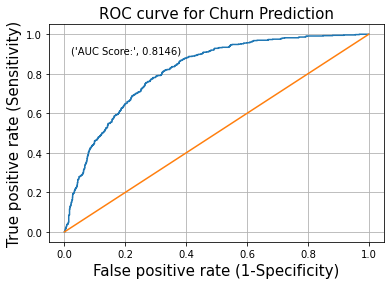

In [140]:
Logistic_model_insights(X_train_ada, X_test, y_train_ada, y_test, logreg_bal, 0.5)

In [141]:
Score_card_logistic(logreg_bal, X_train_ada, X_test, y_train_ada, y_test, 0.5, 'Balanced', 'logreg_bal')
score_card

,Model,Data Balanced/Imbalanced,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logreg_full,Imbalanced,0.500,0.704147,0.642058,0.511586,0.794313,0.436588,0.569444
1,Logreg_full,Imbalanced,0.258,0.766789,0.519630,0.802139,0.750237,0.454734,0.630694
2,logreg_rfe,Imbalanced,0.500,0.706575,0.646532,0.515152,0.796209,0.441780,0.573413
3,logreg_rfe,Imbalanced,0.260,0.763070,0.514943,0.798574,0.746445,0.447528,0.626136
4,logreg_bal,Balanced,0.500,0.736549,0.505535,0.732620,0.738389,0.413816,0.598253


In [142]:
# Using Youden's Index for getting the optimum cut-off
Youdens_index(X_test, y_test, logreg_bal)

,TPR,FPR,Threshold,Difference
0,0.780749,0.291156,0.456713,0.489593


The Train data classification report
              precision    recall  f1-score   support

           0       0.85      0.70      0.77      3614
           1       0.75      0.87      0.81      3628

    accuracy                           0.79      7242
   macro avg       0.80      0.79      0.79      7242
weighted avg       0.80      0.79      0.79      7242

The Test data classification report
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1549
           1       0.49      0.78      0.60       561

    accuracy                           0.72      2110
   macro avg       0.69      0.74      0.69      2110
weighted avg       0.79      0.72      0.74      2110

kappa value: 0.4052671866991131


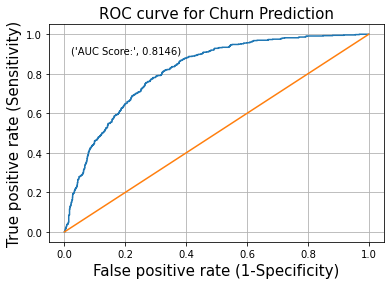

In [143]:
Logistic_model_insights(X_train_ada, X_test, y_train_ada, y_test, logreg_bal, 0.45)

In [144]:
Score_card_logistic(logreg_bal, X_train_ada, X_test, y_train_ada, y_test, 0.45, 'Balanced', 'logreg_bal')
score_card

,Model,Data Balanced/Imbalanced,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logreg_full,Imbalanced,0.500,0.704147,0.642058,0.511586,0.794313,0.436588,0.569444
1,Logreg_full,Imbalanced,0.258,0.766789,0.519630,0.802139,0.750237,0.454734,0.630694
2,logreg_rfe,Imbalanced,0.500,0.706575,0.646532,0.515152,0.796209,0.441780,0.573413
3,logreg_rfe,Imbalanced,0.260,0.763070,0.514943,0.798574,0.746445,0.447528,0.626136
4,logreg_bal,Balanced,0.500,0.736549,0.505535,0.732620,0.738389,0.413816,0.598253
5,logreg_bal,Balanced,0.450,0.741569,0.487208,0.780749,0.723223,0.405267,0.600000


### USing the Feature selection on the basis of the Forward Slection criteria. 

In [145]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [146]:
# logreg = LogisticRegression()

# build forward feature selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. Here '12' is the stopping rule
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
logreg_bal_forward = sfs(estimator=logreg, k_features = 'best', forward=True,
                     verbose=2, scoring='accuracy')

# fit the forward selection on training data using fit()
sfs_forward = logreg_bal_forward.fit(X_train_ada.drop('const', axis= 1), y_train_ada)
t= sfs_forward.k_score_
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)
print('accuracy=',t)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.4s finished

[2022-05-13 11:43:23] Features: 1/22 -- score: 0.6525736934216396[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s finished

[2022-05-13 11:43:24] Features: 2/22 -- score: 0.7031138830742483[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished

[2022-05-13 11:43:24] Features: 3/22 -- score: 0.7144379434855053[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

Features selelected using forward selection are: 
('tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen_1', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check')
accuracy= 0.7734122218028056


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished

[2022-05-13 11:43:37] Features: 21/22 -- score: 0.7729979524839001[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-05-13 11:43:37] Features: 22/22 -- score: 0.7723075353930506

In [147]:
X_train_for= X_train_ada[['const', 'tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen_1', 'Dependents_Yes', 
                      'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 
                      'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 
                      'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 
                      'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]

X_test_for= X_test[['const', 'tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen_1', 'Dependents_Yes', 
                      'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 
                      'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 
                      'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 
                      'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]

In [148]:
# build the model on train data (X_train and y_train)  -- with features taken from the forward selection criteria
# use fit() to fit the logistic regression model
logreg_bal_forward = sm.Logit(y_train_ada, X_train_for).fit()

# print the summary of the model
print(logreg_bal_forward.summary())

Optimization terminated successfully.
         Current function value: 0.436889
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7242
Model:                          Logit   Df Residuals:                     7221
Method:                           MLE   Df Model:                           20
Date:                Fri, 13 May 2022   Pseudo R-squ.:                  0.3697
Time:                        11:43:37   Log-Likelihood:                -3164.0
converged:                       True   LL-Null:                       -5019.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    19.9029      

The Train data classification report
              precision    recall  f1-score   support

           0       0.81      0.74      0.78      3614
           1       0.76      0.83      0.80      3628

    accuracy                           0.79      7242
   macro avg       0.79      0.79      0.79      7242
weighted avg       0.79      0.79      0.79      7242

The Test data classification report
              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1549
           1       0.50      0.73      0.60       561

    accuracy                           0.74      2110
   macro avg       0.69      0.74      0.70      2110
weighted avg       0.78      0.74      0.75      2110

kappa value: 0.4124622475913484


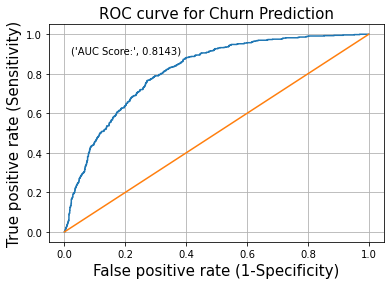

In [149]:
Logistic_model_insights(X_train_for, X_test_for, y_train_ada, y_test, logreg_bal_forward, 0.5)

In [150]:
Score_card_logistic(logreg_bal_forward, X_train_for, X_test_for, y_train_ada, y_test, 0.5, 'Balanced', 'logreg_bal_forward')
score_card

,Model,Data Balanced/Imbalanced,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logreg_full,Imbalanced,0.500,0.704147,0.642058,0.511586,0.794313,0.436588,0.569444
1,Logreg_full,Imbalanced,0.258,0.766789,0.519630,0.802139,0.750237,0.454734,0.630694
2,logreg_rfe,Imbalanced,0.500,0.706575,0.646532,0.515152,0.796209,0.441780,0.573413
3,logreg_rfe,Imbalanced,0.260,0.763070,0.514943,0.798574,0.746445,0.447528,0.626136
4,logreg_bal,Balanced,0.500,0.736549,0.505535,0.732620,0.738389,0.413816,0.598253
5,logreg_bal,Balanced,0.450,0.741569,0.487208,0.780749,0.723223,0.405267,0.600000
6,logreg_bal_forward,Balanced,0.500,0.735658,0.504926,0.730838,0.737915,0.412462,0.597232


In [151]:
# using Youdens Index
Youdens_index(X_test_for, y_test, logreg_bal_forward)

,TPR,FPR,Threshold,Difference
0,0.766488,0.272434,0.476745,0.494055


The Train data classification report
              precision    recall  f1-score   support

           0       0.83      0.72      0.77      3614
           1       0.75      0.86      0.80      3628

    accuracy                           0.79      7242
   macro avg       0.79      0.79      0.79      7242
weighted avg       0.79      0.79      0.79      7242

The Test data classification report
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1549
           1       0.50      0.77      0.60       561

    accuracy                           0.73      2110
   macro avg       0.70      0.74      0.70      2110
weighted avg       0.79      0.73      0.75      2110

kappa value: 0.4152325682741168


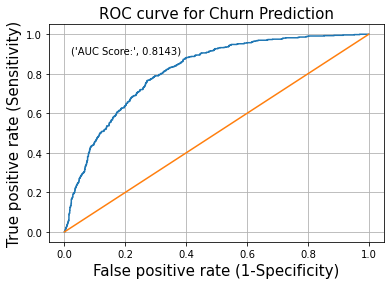

In [152]:
Logistic_model_insights(X_train_for, X_test_for, y_train_ada, y_test, logreg_bal_forward, 0.47)

In [153]:
Score_card_logistic(logreg_bal_forward, X_train_for, X_test_for, y_train_ada, y_test, 0.47, 'Balanced', 'logreg_bal_forward')
score_card

,Model,Data Balanced/Imbalanced,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logreg_full,Imbalanced,0.500,0.704147,0.642058,0.511586,0.794313,0.436588,0.569444
1,Logreg_full,Imbalanced,0.258,0.766789,0.519630,0.802139,0.750237,0.454734,0.630694
2,logreg_rfe,Imbalanced,0.500,0.706575,0.646532,0.515152,0.796209,0.441780,0.573413
3,logreg_rfe,Imbalanced,0.260,0.763070,0.514943,0.798574,0.746445,0.447528,0.626136
4,logreg_bal,Balanced,0.500,0.736549,0.505535,0.732620,0.738389,0.413816,0.598253
5,logreg_bal,Balanced,0.450,0.741569,0.487208,0.780749,0.723223,0.405267,0.600000
6,logreg_bal_forward,Balanced,0.500,0.735658,0.504926,0.730838,0.737915,0.412462,0.597232
7,logreg_bal_forward,Balanced,0.470,0.743968,0.497123,0.770053,0.731754,0.415233,0.604196


###############################################################################################################################

# Next we will try and fit other algorithms like 
1. Decision Tree
2. Random Forest 
3. XGBoost (ADABOOST, Gradient Boost, XGBoost)
4. SVM
5. Naive Bayes

## DECISION TREE 

In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [155]:
# Defining a function for the automated calculations of the classification report and the required metrics
def Interpretation(model, X_train, X_test, y_train, y_test):
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    train_report= classification_report(y_train, y_pred_train)
    print("The Train data classification report")
    print (train_report)
    
    
    
    test_report= classification_report(y_test, y_pred_test)
    print("The Test data classification report") 
    print(test_report)

In [156]:
DTC= DecisionTreeClassifier(criterion='gini', random_state= 10)

decision_tree_gini = DTC.fit(X_train, y_train)

In [157]:
Interpretation(decision_tree_gini, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3614
           1       1.00      0.99      0.99      1308

    accuracy                           1.00      4922
   macro avg       1.00      0.99      1.00      4922
weighted avg       1.00      1.00      1.00      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1549
           1       0.46      0.45      0.46       561

    accuracy                           0.71      2110
   macro avg       0.63      0.63      0.63      2110
weighted avg       0.71      0.71      0.71      2110



In [158]:
DTC_entropy= DecisionTreeClassifier(criterion='entropy', random_state= 10)

decision_tree_entropy = DTC_entropy.fit(X_train, y_train)

In [159]:
Interpretation(decision_tree_entropy, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3614
           1       1.00      0.99      0.99      1308

    accuracy                           1.00      4922
   macro avg       1.00      0.99      1.00      4922
weighted avg       1.00      1.00      1.00      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1549
           1       0.49      0.47      0.48       561

    accuracy                           0.73      2110
   macro avg       0.65      0.65      0.65      2110
weighted avg       0.73      0.73      0.73      2110



In [160]:
Score_card_classification(decision_tree_gini, X_train, X_test, y_train, y_test, 'Imbalanced', 'Decision_tree(Gini)')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696


In [161]:
Score_card_classification(decision_tree_entropy, X_train, X_test, y_train, y_test, 'Imbalanced', 'Decision_tree(Entropy)')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508


### we can clearly see that the model is overfitting here so we wil try to set some parameters beforhand in order to prevent this issue 

In [162]:
DTC_optimised1= DecisionTreeClassifier(
                        criterion='gini',
                        splitter='best',
                        max_depth= 8,
                        min_samples_split=6,
                        min_samples_leaf=1,
                        max_features=None,
                        random_state=10)
decision_tree1 = DTC_optimised1.fit(X_train, y_train)

In [163]:
Interpretation(DTC_optimised1, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3614
           1       0.76      0.61      0.68      1308

    accuracy                           0.84      4922
   macro avg       0.81      0.77      0.79      4922
weighted avg       0.84      0.84      0.84      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1549
           1       0.60      0.45      0.51       561

    accuracy                           0.77      2110
   macro avg       0.71      0.67      0.68      2110
weighted avg       0.76      0.77      0.76      2110



In [164]:
DTC_optimised2= DecisionTreeClassifier(
                        criterion='gini',
                        splitter='best',
                        max_depth= 9,
                        min_samples_split=6,
                        min_samples_leaf=1,
                        max_features=None,
                        random_state=10)
decision_tree2 = DTC_optimised2.fit(X_train, y_train)

In [165]:
Interpretation(DTC_optimised2, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3614
           1       0.77      0.69      0.73      1308

    accuracy                           0.86      4922
   macro avg       0.83      0.81      0.82      4922
weighted avg       0.86      0.86      0.86      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1549
           1       0.56      0.48      0.52       561

    accuracy                           0.76      2110
   macro avg       0.69      0.67      0.68      2110
weighted avg       0.75      0.76      0.76      2110



In [166]:
Score_card_classification(DTC_optimised1, X_train, X_test, y_train, y_test, 'Imbalanced', 'DTC_optimised1')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771


In [167]:
Score_card_classification(DTC_optimised2, X_train, X_test, y_train, y_test, 'Imbalanced', 'DTC_optimised2')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653


In [168]:
from sklearn.model_selection import GridSearchCV

In [169]:
# tuning the Hyperparameters using Gridsearch 
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
DTC = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 8
DTC_grid = GridSearchCV(estimator = DTC, 
                         param_grid = tuned_paramaters, 
                         cv = 8)

# fit the model on X_train and y_train using fit()
DTC_model= DTC_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', DTC_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [170]:
# building a model using the best parameters 

In [171]:
DTC_optimised_best= DecisionTreeClassifier(
                         criterion=  'gini', max_depth =4, max_features= 'sqrt', 
                        max_leaf_nodes= 7, min_samples_leaf=1, min_samples_split= 2, random_state= 10)
decision_tree2_best = DTC_optimised_best.fit(X_train, y_train)

In [172]:
Interpretation(decision_tree2_best, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      3614
           1       0.62      0.53      0.57      1308

    accuracy                           0.79      4922
   macro avg       0.73      0.71      0.71      4922
weighted avg       0.78      0.79      0.78      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.63      0.50      0.56       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [173]:
Score_card_classification(decision_tree2_best, X_train, X_test, y_train, y_test, 'Imbalanced', 'decision_tree2_best')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653
4,decision_tree2_best,Imbalanced,0.626667,0.502674,0.788152,0.420768,0.557864


### as we can see that the accuracy is going down as we are decreasing max_depth. 
### with Gridsearc we have found that the model is Underfitting. 
### Recall score is also very low which is major requirement of tis type of classifiations 
### Also it is seen that we need to explore other algorithms for better results 

# Random Forest 

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
RFC= RandomForestClassifier(n_estimators= 6, random_state= 10)
RFC_model1= RFC.fit(X_train, y_train)

In [176]:
Interpretation(RFC_model1, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3614
           1       0.98      0.87      0.92      1308

    accuracy                           0.96      4922
   macro avg       0.97      0.93      0.95      4922
weighted avg       0.96      0.96      0.96      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1549
           1       0.61      0.37      0.46       561

    accuracy                           0.77      2110
   macro avg       0.70      0.64      0.65      2110
weighted avg       0.75      0.77      0.75      2110



In [177]:
# clearly the model overfits 

In [178]:
Score_card_classification(RFC_model1, X_train, X_test, y_train, y_test, 'Imbalanced', 'RFC_model1')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653
4,decision_tree2_best,Imbalanced,0.626667,0.502674,0.788152,0.420768,0.557864
5,RFC_model1,Imbalanced,0.606509,0.365419,0.768246,0.320141,0.456062


# adaboost 

In [179]:
from sklearn.ensemble import AdaBoostClassifier

In [180]:
adaboost= AdaBoostClassifier(n_estimators=40, random_state= 10)

adaboost_model= adaboost.fit(X_train, y_train)

In [181]:
Interpretation(adaboost_model, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3614
           1       0.69      0.54      0.60      1308

    accuracy                           0.81      4922
   macro avg       0.77      0.73      0.74      4922
weighted avg       0.80      0.81      0.80      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.66      0.49      0.56       561

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [182]:
Score_card_classification(adaboost_model, X_train, X_test, y_train, y_test, 'Imbalanced', 'adaboost_model')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653
4,decision_tree2_best,Imbalanced,0.626667,0.502674,0.788152,0.420768,0.557864
5,RFC_model1,Imbalanced,0.606509,0.365419,0.768246,0.320141,0.456062
6,adaboost_model,Imbalanced,0.662651,0.490196,0.798104,0.436002,0.563525


In [183]:
# Recall score is still not achieved to the required level 

In [184]:
from sklearn.ensemble import GradientBoostingClassifier

In [185]:
Gboost= GradientBoostingClassifier(n_estimators=40, random_state= 10)

Gboost_model= Gboost.fit(X_train, y_train)

In [186]:
Interpretation(Gboost_model, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3614
           1       0.71      0.51      0.60      1308

    accuracy                           0.81      4922
   macro avg       0.77      0.72      0.74      4922
weighted avg       0.81      0.81      0.80      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1549
           1       0.68      0.46      0.55       561

    accuracy                           0.80      2110
   macro avg       0.76      0.69      0.71      2110
weighted avg       0.79      0.80      0.79      2110



In [187]:
Score_card_classification(Gboost_model, X_train, X_test, y_train, y_test, 'Imbalanced', 'Gboost_model')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653
4,decision_tree2_best,Imbalanced,0.626667,0.502674,0.788152,0.420768,0.557864
5,RFC_model1,Imbalanced,0.606509,0.365419,0.768246,0.320141,0.456062
6,adaboost_model,Imbalanced,0.662651,0.490196,0.798104,0.436002,0.563525
7,Gboost_model,Imbalanced,0.684211,0.463458,0.800474,0.430260,0.552604


In [188]:
# Using XGBoost method 

In [189]:
from xgboost import XGBClassifier

In [190]:
XGB= XGBClassifier(max_depth= 10, gamma= 1)
XGB_model= XGB.fit(X_train, y_train)

[11:57:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [191]:
Interpretation(XGB_model, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3614
           1       0.94      0.88      0.91      1308

    accuracy                           0.95      4922
   macro avg       0.95      0.93      0.94      4922
weighted avg       0.95      0.95      0.95      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.61      0.45      0.52       561

    accuracy                           0.78      2110
   macro avg       0.71      0.67      0.69      2110
weighted avg       0.76      0.78      0.77      2110



In [192]:
Score_card_classification(XGB_model, X_train, X_test, y_train, y_test, 'Imbalanced', 'XGB_model')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653
4,decision_tree2_best,Imbalanced,0.626667,0.502674,0.788152,0.420768,0.557864
5,RFC_model1,Imbalanced,0.606509,0.365419,0.768246,0.320141,0.456062
6,adaboost_model,Imbalanced,0.662651,0.490196,0.798104,0.436002,0.563525
7,Gboost_model,Imbalanced,0.684211,0.463458,0.800474,0.430260,0.552604
8,XGB_model,Imbalanced,0.610577,0.452763,0.777725,0.379458,0.519959


In [193]:
# Hyperparameter tuning using Gridsearch 

tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

# instantiate the 'XGBClassifier' 
XGB = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
XGB_grid = GridSearchCV(estimator = XGB, param_grid = tuning_parameters, cv = 3, scoring = 'recall')

# fit the model on X_train and y_train using fit()
XGB_model= XGB_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', XGB_model.best_params_, '\n')

[11:57:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:57:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:57:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:57:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [194]:
# fit a model using the best parameters found in the above Gridsearch
XGB_best= XGBClassifier(gamma= 0, learning_rate= 0.3, max_depth= 5)
XGB_model_best= XGB_best.fit(X_train, y_train)

[12:00:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [195]:
Interpretation(XGB_model_best, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3614
           1       0.89      0.78      0.83      1308

    accuracy                           0.92      4922
   macro avg       0.91      0.87      0.89      4922
weighted avg       0.91      0.92      0.91      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.63      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



In [196]:
Score_card_classification(XGB_model_best, X_train, X_test, y_train, y_test, 'Imbalanced', 'XGB_model_best')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653
4,decision_tree2_best,Imbalanced,0.626667,0.502674,0.788152,0.420768,0.557864
5,RFC_model1,Imbalanced,0.606509,0.365419,0.768246,0.320141,0.456062
6,adaboost_model,Imbalanced,0.662651,0.490196,0.798104,0.436002,0.563525
7,Gboost_model,Imbalanced,0.684211,0.463458,0.800474,0.430260,0.552604
8,XGB_model,Imbalanced,0.610577,0.452763,0.777725,0.379458,0.519959
9,XGB_model_best,Imbalanced,0.625571,0.488414,0.786256,0.411298,0.548549


# For balanced data

# Decision Tree

In [197]:
DTC= DecisionTreeClassifier(criterion='gini', random_state= 10)

decision_tree_gini_bal = DTC.fit(X_train_ada, y_train_ada)

In [198]:
Interpretation(decision_tree_gini_bal, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3614
           1       1.00      1.00      1.00      3628

    accuracy                           1.00      7242
   macro avg       1.00      1.00      1.00      7242
weighted avg       1.00      1.00      1.00      7242

The Test data classification report
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1549
           1       0.46      0.55      0.50       561

    accuracy                           0.71      2110
   macro avg       0.64      0.66      0.65      2110
weighted avg       0.73      0.71      0.72      2110



### overfitting data on train result

In [199]:
DTC_entropy= DecisionTreeClassifier(criterion='entropy', random_state= 10)

decision_tree_entropy_bal = DTC_entropy.fit(X_train_ada, y_train_ada)

In [200]:
Interpretation(decision_tree_entropy_bal, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3614
           1       1.00      1.00      1.00      3628

    accuracy                           1.00      7242
   macro avg       1.00      1.00      1.00      7242
weighted avg       1.00      1.00      1.00      7242

The Test data classification report
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1549
           1       0.46      0.57      0.51       561

    accuracy                           0.71      2110
   macro avg       0.64      0.66      0.65      2110
weighted avg       0.73      0.71      0.72      2110



In [201]:
DTC_optimised3= DecisionTreeClassifier(
                        criterion='entropy',
                        splitter='best',
                        max_depth= 8,
                        min_samples_split=6,
                        min_samples_leaf=1,
                        max_features=None,
                        random_state=10)
decision_tree3_bal = DTC_optimised3.fit(X_train_ada, y_train_ada)

In [202]:
Interpretation(decision_tree3_bal, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.85      0.70      0.76      3614
           1       0.74      0.88      0.80      3628

    accuracy                           0.79      7242
   macro avg       0.80      0.79      0.78      7242
weighted avg       0.80      0.79      0.78      7242

The Test data classification report
              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1549
           1       0.47      0.84      0.61       561

    accuracy                           0.71      2110
   macro avg       0.70      0.75      0.69      2110
weighted avg       0.80      0.71      0.73      2110



In [203]:
DTC_optimised4= DecisionTreeClassifier(
                        criterion='gini',
                        splitter='best',
                        max_depth= 9,
                        min_samples_split=6,
                        min_samples_leaf=1,
                        max_features=None,
                        random_state=10)
decision_tree4_bal = DTC_optimised4.fit(X_train, y_train)

In [204]:
Interpretation(decision_tree4_bal, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.67      0.93      0.78      3614
           1       0.88      0.54      0.67      3628

    accuracy                           0.73      7242
   macro avg       0.77      0.73      0.72      7242
weighted avg       0.77      0.73      0.72      7242

The Test data classification report
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1549
           1       0.56      0.48      0.52       561

    accuracy                           0.76      2110
   macro avg       0.69      0.67      0.68      2110
weighted avg       0.75      0.76      0.76      2110



In [205]:
Score_card_classification(decision_tree_gini_bal, X_train_ada, X_test, y_train_ada, y_test, 'Balanced', 'decision_tree2_best')
Score_card_classification(decision_tree_entropy_bal, X_train_ada, X_test, y_train_ada, y_test, 'Balanced', 'decision_tree_entropy_bal')
Score_card_classification(decision_tree3_bal, X_train_ada, X_test, y_train_ada, y_test, 'Balanced', 'decision_tree3_bal')
Score_card_classification(decision_tree4_bal, X_train_ada, X_test, y_train_ada, y_test, 'Balanced', 'decision_tree4_bal')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653
4,decision_tree2_best,Imbalanced,0.626667,0.502674,0.788152,0.420768,0.557864
5,RFC_model1,Imbalanced,0.606509,0.365419,0.768246,0.320141,0.456062
6,adaboost_model,Imbalanced,0.662651,0.490196,0.798104,0.436002,0.563525
7,Gboost_model,Imbalanced,0.684211,0.463458,0.800474,0.430260,0.552604
8,XGB_model,Imbalanced,0.610577,0.452763,0.777725,0.379458,0.519959
9,XGB_model_best,Imbalanced,0.625571,0.488414,0.786256,0.411298,0.548549


In [206]:
# tuning the Hyperparameters using Gridsearch 
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
DTC = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 8
DTC_grid = GridSearchCV(estimator = DTC, 
                         param_grid = tuned_paramaters, 
                         cv = 8)

# fit the model on X_train and y_train using fit()
DTC_model= DTC_grid.fit(X_train_ada, y_train_ada)

# get the best parameters
print('Best parameters for decision tree classifier: ', DTC_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [207]:
DTC_optimised_best= DecisionTreeClassifier(
                         criterion= 'gini', max_depth= 3, max_features= 'sqrt', max_leaf_nodes= 8, min_samples_leaf= 1, min_samples_split= 2)
decision_tree2_best_bal = DTC_optimised_best.fit(X_train_ada, y_train_ada)

In [208]:
Interpretation(decision_tree2_best_bal, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.70      0.59      0.64      3614
           1       0.65      0.75      0.69      3628

    accuracy                           0.67      7242
   macro avg       0.67      0.67      0.67      7242
weighted avg       0.67      0.67      0.67      7242

The Test data classification report
              precision    recall  f1-score   support

           0       0.87      0.58      0.70      1549
           1       0.40      0.76      0.52       561

    accuracy                           0.63      2110
   macro avg       0.63      0.67      0.61      2110
weighted avg       0.74      0.63      0.65      2110



In [209]:
Score_card_classification(decision_tree2_best_bal, X_train_ada, X_test, y_train_ada, y_test, 'Balanced', 'decision_tree2_best_bal')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653
4,decision_tree2_best,Imbalanced,0.626667,0.502674,0.788152,0.420768,0.557864
5,RFC_model1,Imbalanced,0.606509,0.365419,0.768246,0.320141,0.456062
6,adaboost_model,Imbalanced,0.662651,0.490196,0.798104,0.436002,0.563525
7,Gboost_model,Imbalanced,0.684211,0.463458,0.800474,0.430260,0.552604
8,XGB_model,Imbalanced,0.610577,0.452763,0.777725,0.379458,0.519959
9,XGB_model_best,Imbalanced,0.625571,0.488414,0.786256,0.411298,0.548549


### as we can see that the accuracy is going down as we are decreasing max_depth. 
### with Gridsearc we have found that the model is Underfitting. 
### Recall score is also fine which is major requirement of this type of classifiations 
### Also it is seen that we need to explore other algorithms for better results 

# Random Forest

In [210]:
RFC= RandomForestClassifier(n_estimators= 6, random_state= 10)
RFC_model2= RFC.fit(X_train_ada, y_train_ada)

In [211]:
Interpretation(RFC_model2, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3614
           1       0.99      0.97      0.98      3628

    accuracy                           0.98      7242
   macro avg       0.98      0.98      0.98      7242
weighted avg       0.98      0.98      0.98      7242

The Test data classification report
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1549
           1       0.57      0.56      0.57       561

    accuracy                           0.77      2110
   macro avg       0.71      0.70      0.71      2110
weighted avg       0.77      0.77      0.77      2110



In [212]:
Score_card_classification(RFC_model2, X_train_ada, X_test, y_train_ada, y_test, 'Balanced', 'RFC_model2')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653
4,decision_tree2_best,Imbalanced,0.626667,0.502674,0.788152,0.420768,0.557864
5,RFC_model1,Imbalanced,0.606509,0.365419,0.768246,0.320141,0.456062
6,adaboost_model,Imbalanced,0.662651,0.490196,0.798104,0.436002,0.563525
7,Gboost_model,Imbalanced,0.684211,0.463458,0.800474,0.430260,0.552604
8,XGB_model,Imbalanced,0.610577,0.452763,0.777725,0.379458,0.519959
9,XGB_model_best,Imbalanced,0.625571,0.488414,0.786256,0.411298,0.548549


# Adaboost

In [213]:
adaboost= AdaBoostClassifier(n_estimators=40, random_state= 10)

adaboost_model_bal= adaboost.fit(X_train_ada, y_train_ada)

In [214]:
Interpretation(adaboost_model_bal, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      3614
           1       0.74      0.83      0.78      3628

    accuracy                           0.77      7242
   macro avg       0.77      0.77      0.77      7242
weighted avg       0.77      0.77      0.77      7242

The Test data classification report
              precision    recall  f1-score   support

           0       0.92      0.70      0.79      1549
           1       0.50      0.84      0.63       561

    accuracy                           0.73      2110
   macro avg       0.71      0.77      0.71      2110
weighted avg       0.81      0.73      0.75      2110



In [215]:
Score_card_classification(adaboost_model_bal, X_train_ada, X_test, y_train_ada, y_test, 'Balanced', 'adaboost_model_bal')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653
4,decision_tree2_best,Imbalanced,0.626667,0.502674,0.788152,0.420768,0.557864
5,RFC_model1,Imbalanced,0.606509,0.365419,0.768246,0.320141,0.456062
6,adaboost_model,Imbalanced,0.662651,0.490196,0.798104,0.436002,0.563525
7,Gboost_model,Imbalanced,0.684211,0.463458,0.800474,0.430260,0.552604
8,XGB_model,Imbalanced,0.610577,0.452763,0.777725,0.379458,0.519959
9,XGB_model_best,Imbalanced,0.625571,0.488414,0.786256,0.411298,0.548549


### low recall and f1 score in test set

In [216]:
Gboost= GradientBoostingClassifier(n_estimators=40, random_state= 10)

Gboost_model_bal= Gboost.fit(X_train_ada, y_train_ada)

In [217]:
Interpretation(Gboost_model_bal, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      3614
           1       0.74      0.84      0.79      3628

    accuracy                           0.77      7242
   macro avg       0.78      0.77      0.77      7242
weighted avg       0.78      0.77      0.77      7242

The Test data classification report
              precision    recall  f1-score   support

           0       0.92      0.70      0.80      1549
           1       0.50      0.83      0.63       561

    accuracy                           0.74      2110
   macro avg       0.71      0.77      0.71      2110
weighted avg       0.81      0.74      0.75      2110



In [218]:
Score_card_classification(Gboost_model_bal, X_train_ada, X_test, y_train_ada, y_test, 'Balanced', 'Gboost_model_bal')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653
4,decision_tree2_best,Imbalanced,0.626667,0.502674,0.788152,0.420768,0.557864
5,RFC_model1,Imbalanced,0.606509,0.365419,0.768246,0.320141,0.456062
6,adaboost_model,Imbalanced,0.662651,0.490196,0.798104,0.436002,0.563525
7,Gboost_model,Imbalanced,0.684211,0.463458,0.800474,0.430260,0.552604
8,XGB_model,Imbalanced,0.610577,0.452763,0.777725,0.379458,0.519959
9,XGB_model_best,Imbalanced,0.625571,0.488414,0.786256,0.411298,0.548549


# XGboost

In [219]:
XGB= XGBClassifier(max_depth= 10, gamma= 1)
XGB_model_bal= XGB.fit(X_train_ada, y_train_ada)

[12:20:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [220]:
Interpretation(XGB_model_bal, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3614
           1       0.96      0.99      0.98      3628

    accuracy                           0.98      7242
   macro avg       0.98      0.98      0.98      7242
weighted avg       0.98      0.98      0.98      7242

The Test data classification report
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1549
           1       0.55      0.63      0.58       561

    accuracy                           0.76      2110
   macro avg       0.70      0.72      0.71      2110
weighted avg       0.77      0.76      0.77      2110



In [221]:
Score_card_classification(XGB_model_bal, X_train_ada, X_test, y_train_ada, y_test, 'Balanced', 'XGB_model_bal')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653
4,decision_tree2_best,Imbalanced,0.626667,0.502674,0.788152,0.420768,0.557864
5,RFC_model1,Imbalanced,0.606509,0.365419,0.768246,0.320141,0.456062
6,adaboost_model,Imbalanced,0.662651,0.490196,0.798104,0.436002,0.563525
7,Gboost_model,Imbalanced,0.684211,0.463458,0.800474,0.430260,0.552604
8,XGB_model,Imbalanced,0.610577,0.452763,0.777725,0.379458,0.519959
9,XGB_model_best,Imbalanced,0.625571,0.488414,0.786256,0.411298,0.548549


In [222]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

# instantiate the 'XGBClassifier' 
XGB = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
XGB_grid = GridSearchCV(estimator = XGB, param_grid = tuning_parameters, cv = 3, scoring = 'recall')

# fit the model on X_train and y_train using fit()
XGB_model= XGB_grid.fit(X_train_ada, y_train_ada)

# get the best parameters
print('Best parameters for XGBoost classifier: ', XGB_model.best_params_, '\n')

[12:20:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:20:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [223]:
XGB_best= XGBClassifier(gamma= 4, learning_rate= 0.3, max_depth= 6)
XGB_model_bal_best= XGB_best.fit(X_train_ada, y_train_ada)

[12:22:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [224]:
Interpretation(XGB_model_bal_best, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      3614
           1       0.81      0.91      0.85      3628

    accuracy                           0.85      7242
   macro avg       0.85      0.85      0.84      7242
weighted avg       0.85      0.85      0.84      7242

The Test data classification report
              precision    recall  f1-score   support

           0       0.90      0.75      0.81      1549
           1       0.52      0.76      0.62       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.75      0.76      2110



In [225]:
Score_card_classification(XGB_model_bal_best, X_train_ada, X_test, y_train_ada, y_test, 'Balanced', 'XGB_model_bal_best')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653
4,decision_tree2_best,Imbalanced,0.626667,0.502674,0.788152,0.420768,0.557864
5,RFC_model1,Imbalanced,0.606509,0.365419,0.768246,0.320141,0.456062
6,adaboost_model,Imbalanced,0.662651,0.490196,0.798104,0.436002,0.563525
7,Gboost_model,Imbalanced,0.684211,0.463458,0.800474,0.430260,0.552604
8,XGB_model,Imbalanced,0.610577,0.452763,0.777725,0.379458,0.519959
9,XGB_model_best,Imbalanced,0.625571,0.488414,0.786256,0.411298,0.548549


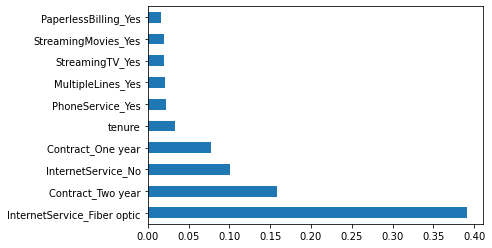

In [226]:
feature_importance(XGB_model_best,X_train_ada)

# Naive bayes

## For imbalanced dataset


In [227]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_model= gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = gnb_model.predict(X_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred))

Gaussian Naive Bayes model accuracy(in %): 0.7464454976303317


In [228]:
Interpretation(gnb_model, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      3614
           1       0.52      0.77      0.62      1308

    accuracy                           0.75      4922
   macro avg       0.71      0.76      0.72      4922
weighted avg       0.80      0.75      0.76      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1549
           1       0.52      0.76      0.61       561

    accuracy                           0.75      2110
   macro avg       0.71      0.75      0.71      2110
weighted avg       0.79      0.75      0.76      2110



In [229]:
Score_card_classification(gnb_model, X_train, X_test, y_train, y_test, 'Imbalanced', 'gnb_model')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653
4,decision_tree2_best,Imbalanced,0.626667,0.502674,0.788152,0.420768,0.557864
5,RFC_model1,Imbalanced,0.606509,0.365419,0.768246,0.320141,0.456062
6,adaboost_model,Imbalanced,0.662651,0.490196,0.798104,0.436002,0.563525
7,Gboost_model,Imbalanced,0.684211,0.463458,0.800474,0.430260,0.552604
8,XGB_model,Imbalanced,0.610577,0.452763,0.777725,0.379458,0.519959
9,XGB_model_best,Imbalanced,0.625571,0.488414,0.786256,0.411298,0.548549


## For balanced dataset

In [230]:
gnb = GaussianNB()
gnb_bal_model= gnb.fit(X_train_ada, y_train_ada)
 
#making predictions on the testing set
y_pred = gnb_bal_model.predict(X_test)
 
#comparing actual response values (y_test) with predicted response values (y_pred)

print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred))

Gaussian Naive Bayes model accuracy(in %): 0.7199052132701422


In [231]:
Interpretation(gnb_bal_model, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      3614
           1       0.72      0.77      0.74      3628

    accuracy                           0.73      7242
   macro avg       0.73      0.73      0.73      7242
weighted avg       0.73      0.73      0.73      7242

The Test data classification report
              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1549
           1       0.48      0.81      0.60       561

    accuracy                           0.72      2110
   macro avg       0.70      0.75      0.69      2110
weighted avg       0.79      0.72      0.74      2110



In [232]:
Score_card_classification(gnb_bal_model, X_train_ada, X_test, y_train_ada, y_test, 'Balanced', 'gnb_bal_model')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653
4,decision_tree2_best,Imbalanced,0.626667,0.502674,0.788152,0.420768,0.557864
5,RFC_model1,Imbalanced,0.606509,0.365419,0.768246,0.320141,0.456062
6,adaboost_model,Imbalanced,0.662651,0.490196,0.798104,0.436002,0.563525
7,Gboost_model,Imbalanced,0.684211,0.463458,0.800474,0.430260,0.552604
8,XGB_model,Imbalanced,0.610577,0.452763,0.777725,0.379458,0.519959
9,XGB_model_best,Imbalanced,0.625571,0.488414,0.786256,0.411298,0.548549


## SVM

In [233]:
#SVC for imbalanced data

from sklearn.svm import SVC

sv = SVC()
sv_model = sv.fit(X_train, y_train)


In [234]:
Interpretation(sv_model, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3614
           1       0.71      0.52      0.60      1308

    accuracy                           0.81      4922
   macro avg       0.77      0.72      0.74      4922
weighted avg       0.81      0.81      0.80      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1549
           1       0.67      0.45      0.54       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110



In [235]:
Score_card_classification(sv_model, X_train, X_test, y_train, y_test, 'Imbalanced', 'sv_model')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653
4,decision_tree2_best,Imbalanced,0.626667,0.502674,0.788152,0.420768,0.557864
5,RFC_model1,Imbalanced,0.606509,0.365419,0.768246,0.320141,0.456062
6,adaboost_model,Imbalanced,0.662651,0.490196,0.798104,0.436002,0.563525
7,Gboost_model,Imbalanced,0.684211,0.463458,0.800474,0.430260,0.552604
8,XGB_model,Imbalanced,0.610577,0.452763,0.777725,0.379458,0.519959
9,XGB_model_best,Imbalanced,0.625571,0.488414,0.786256,0.411298,0.548549


In [236]:
#SVC for balanced data


sv_bal_model = sv.fit(X_train_ada,y_train_ada)

In [237]:
Interpretation(sv_bal_model,X_train_ada, X_test, y_train_ada, y_test )

The Train data classification report
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      3614
           1       0.77      0.90      0.83      3628

    accuracy                           0.81      7242
   macro avg       0.82      0.81      0.81      7242
weighted avg       0.82      0.81      0.81      7242

The Test data classification report
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1549
           1       0.50      0.80      0.61       561

    accuracy                           0.73      2110
   macro avg       0.70      0.75      0.70      2110
weighted avg       0.80      0.73      0.75      2110



In [238]:
Score_card_classification(sv_bal_model, X_train_ada, X_test, y_train_ada, y_test, 'Balanced', 'sv_bal_model')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653
4,decision_tree2_best,Imbalanced,0.626667,0.502674,0.788152,0.420768,0.557864
5,RFC_model1,Imbalanced,0.606509,0.365419,0.768246,0.320141,0.456062
6,adaboost_model,Imbalanced,0.662651,0.490196,0.798104,0.436002,0.563525
7,Gboost_model,Imbalanced,0.684211,0.463458,0.800474,0.430260,0.552604
8,XGB_model,Imbalanced,0.610577,0.452763,0.777725,0.379458,0.519959
9,XGB_model_best,Imbalanced,0.625571,0.488414,0.786256,0.411298,0.548549


In [239]:
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653
4,decision_tree2_best,Imbalanced,0.626667,0.502674,0.788152,0.420768,0.557864
5,RFC_model1,Imbalanced,0.606509,0.365419,0.768246,0.320141,0.456062
6,adaboost_model,Imbalanced,0.662651,0.490196,0.798104,0.436002,0.563525
7,Gboost_model,Imbalanced,0.684211,0.463458,0.800474,0.430260,0.552604
8,XGB_model,Imbalanced,0.610577,0.452763,0.777725,0.379458,0.519959
9,XGB_model_best,Imbalanced,0.625571,0.488414,0.786256,0.411298,0.548549


## LGBM

## For Imbalanced dataset

In [240]:
from lightgbm import LGBMClassifier
lgbmmodel = LGBMClassifier()

Lgbm_model=lgbmmodel.fit(X_train, y_train)
Interpretation(Lgbm_model, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3614
           1       0.83      0.70      0.76      1308

    accuracy                           0.88      4922
   macro avg       0.86      0.82      0.84      4922
weighted avg       0.88      0.88      0.88      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110



In [241]:
Score_card_classification(Lgbm_model, X_train, X_test, y_train, y_test, 'Imbalanced', 'Lgbm_model')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653
4,decision_tree2_best,Imbalanced,0.626667,0.502674,0.788152,0.420768,0.557864
5,RFC_model1,Imbalanced,0.606509,0.365419,0.768246,0.320141,0.456062
6,adaboost_model,Imbalanced,0.662651,0.490196,0.798104,0.436002,0.563525
7,Gboost_model,Imbalanced,0.684211,0.463458,0.800474,0.430260,0.552604
8,XGB_model,Imbalanced,0.610577,0.452763,0.777725,0.379458,0.519959
9,XGB_model_best,Imbalanced,0.625571,0.488414,0.786256,0.411298,0.548549


# For Balanced dataset

In [272]:
from lightgbm import LGBMClassifier
lgbmmodel = LGBMClassifier()
Lgbm_model_bal=lgbmmodel.fit(X_train_ada, y_train_ada)
Interpretation(Lgbm_model_bal, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      3614
           1       0.85      0.94      0.89      3628

    accuracy                           0.89      7242
   macro avg       0.89      0.89      0.89      7242
weighted avg       0.89      0.89      0.89      7242

The Test data classification report
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      1549
           1       0.54      0.75      0.63       561

    accuracy                           0.77      2110
   macro avg       0.72      0.76      0.73      2110
weighted avg       0.80      0.77      0.78      2110



In [273]:
Score_card_classification(Lgbm_model_bal, X_train_ada, X_test, y_train_ada, y_test, 'Balanced', 'Lgbm_model_bal')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653
4,decision_tree2_best,Imbalanced,0.626667,0.502674,0.788152,0.420768,0.557864
5,RFC_model1,Imbalanced,0.606509,0.365419,0.768246,0.320141,0.456062
6,adaboost_model,Imbalanced,0.662651,0.490196,0.798104,0.436002,0.563525
7,Gboost_model,Imbalanced,0.684211,0.463458,0.800474,0.430260,0.552604
8,XGB_model,Imbalanced,0.610577,0.452763,0.777725,0.379458,0.519959
9,XGB_model_best,Imbalanced,0.625571,0.488414,0.786256,0.411298,0.548549


In [274]:
score_card_classification.iloc[20:26]

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
20,gnb_model,Imbalanced,0.515738,0.759358,0.746445,0.435518,0.614275
21,gnb_bal_model,Balanced,0.483940,0.805704,0.719905,0.408019,0.604682
22,sv_model,Imbalanced,0.665796,0.454545,0.794313,0.413782,0.540254
23,sv_bal_model,Balanced,0.498335,0.800357,0.732701,0.426182,0.614227
24,Lgbm_model,Imbalanced,0.635934,0.479501,0.788626,0.412438,0.546748
25,Lgbm_model_bal,Balanced,0.544863,0.746881,0.766825,0.465845,0.630075


# Tuning LGBM Model


In [ ]:
##IM

In [251]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold





gkf = KFold(n_splits=5, shuffle=True, random_state=42).split(X=X_train, y=y_train)

param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt',  objective='binary', num_boost_round=2000, learning_rate=0.01, metric='auc')

gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=gkf)
lgb_model = gsearch.fit(X=X_train, y=y_train)

print(lgb_model.best_params_, lgb_model.best_score_)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_

In [252]:
print(lgb_model.best_params_, lgb_model.best_score_)

{'lambda_l1': 1, 'lambda_l2': 0, 'min_data_in_leaf': 400, 'num_leaves': 31, 'reg_alpha': 0.1} 0.8076032767941893


In [312]:
LGB_otimized_best= LGBMClassifier(lambda_l1= 1, lambda_l2= 0, min_data_in_leaf= 400,
                                  num_leaves= 31, reg_alpha=0.1)
LGB_otimized_best_imb1 = LGB_otimized_best.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0


In [313]:
Interpretation(LGB_otimized_best_imb1, X_train, X_test, y_train, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3614
           1       0.71      0.56      0.63      1308

    accuracy                           0.82      4922
   macro avg       0.78      0.74      0.76      4922
weighted avg       0.82      0.82      0.82      4922

The Test data classification report
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.67      0.49      0.57       561

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110



In [318]:
Score_card_classification(LGB_otimized_best_imb1, X_train, X_test, y_train, y_test, 'Imbalanced', 'LGB_otimized_best_imb1')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653
4,decision_tree2_best,Imbalanced,0.626667,0.502674,0.788152,0.420768,0.557864
5,RFC_model1,Imbalanced,0.606509,0.365419,0.768246,0.320141,0.456062
6,adaboost_model,Imbalanced,0.662651,0.490196,0.798104,0.436002,0.563525
7,Gboost_model,Imbalanced,0.684211,0.463458,0.800474,0.430260,0.552604
8,XGB_model,Imbalanced,0.610577,0.452763,0.777725,0.379458,0.519959
9,XGB_model_best,Imbalanced,0.625571,0.488414,0.786256,0.411298,0.548549


## Balance Dataset

In [261]:
gkf = KFold(n_splits=5, shuffle=True, random_state=42).split(X=X_train_ada, y=y_train_ada)

param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt',  objective='binary', num_boost_round=2000, learning_rate=0.01, metric='auc')

gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=gkf)
lgb_model = gsearch.fit(X=X_train_ada, y=y_train_ada)

print(lgb_model.best_params_, lgb_model.best_score_)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_

In [319]:
LGB_otimized_best2= LGBMClassifier(lambda_l1= 0, lambda_l2= 0, min_data_in_leaf= 30,
                                  num_leaves= 127, reg_alpha=0.1)
LGB_otimized_best_bal = LGB_otimized_best2.fit(X_train_ada, y_train_ada)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0


In [320]:
Interpretation(LGB_otimized_best_bal, X_train_ada, X_test, y_train_ada, y_test)

The Train data classification report
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3614
           1       0.96      0.99      0.97      3628

    accuracy                           0.97      7242
   macro avg       0.97      0.97      0.97      7242
weighted avg       0.97      0.97      0.97      7242

The Test data classification report
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1549
           1       0.55      0.62      0.58       561

    accuracy                           0.76      2110
   macro avg       0.70      0.72      0.71      2110
weighted avg       0.77      0.76      0.77      2110



In [321]:
Score_card_classification(LGB_otimized_best_bal, X_train_ada, X_test, y_train_ada, y_test, 'Balanced', 'LGB_otimized_best_bal')
score_card_classification

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision_tree(Gini),Imbalanced,0.462385,0.449198,0.714692,0.262431,0.455696
1,Decision_tree(Entropy),Imbalanced,0.488930,0.472371,0.728436,0.296751,0.480508
2,DTC_optimised1,Imbalanced,0.600962,0.445633,0.773934,0.368873,0.511771
3,DTC_optimised2,Imbalanced,0.564583,0.483066,0.763507,0.364945,0.520653
4,decision_tree2_best,Imbalanced,0.626667,0.502674,0.788152,0.420768,0.557864
5,RFC_model1,Imbalanced,0.606509,0.365419,0.768246,0.320141,0.456062
6,adaboost_model,Imbalanced,0.662651,0.490196,0.798104,0.436002,0.563525
7,Gboost_model,Imbalanced,0.684211,0.463458,0.800474,0.430260,0.552604
8,XGB_model,Imbalanced,0.610577,0.452763,0.777725,0.379458,0.519959
9,XGB_model_best,Imbalanced,0.625571,0.488414,0.786256,0.411298,0.548549


In [322]:
score_card_classification[20:28]

,Model,Data Balanced/Imbalanced,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
20,gnb_model,Imbalanced,0.515738,0.759358,0.746445,0.435518,0.614275
21,gnb_bal_model,Balanced,0.483940,0.805704,0.719905,0.408019,0.604682
22,sv_model,Imbalanced,0.665796,0.454545,0.794313,0.413782,0.540254
23,sv_bal_model,Balanced,0.498335,0.800357,0.732701,0.426182,0.614227
24,Lgbm_model,Imbalanced,0.635934,0.479501,0.788626,0.412438,0.546748
25,Lgbm_model_bal,Balanced,0.544863,0.746881,0.766825,0.465845,0.630075
26,LGB_otimized_best_imb1,Imbalanced,0.674074,0.486631,0.800948,0.440477,0.565217
27,LGB_otimized_best_bal,Balanced,0.546022,0.623886,0.762085,0.417056,0.582363
